# What's new since last year's UGM? 2021 RDKit UGM Edition

Not an exhaustive list, just some examples.
Covers 2020.09, 2021.03, and the forthcoming 2021.09 release.

## Big code changes




### Backwards incompatible changes
(Ongoing)

We've started to gradually make changes to the code that may be either backwards incompatible or may change the default results. These are documented in a section of the release notes and are generally tagged with `Changes Results` in github.

Here are examples from the three releases covered here:
#### 2020.09
```
- We've added additional allowed valences for Cl (now 1, 3, 5), Br (now 1, 3,
  5), I (now 1, 3, 5), At (now 1, 3, 5), Xe (now 0, 2, 4, 6), and Po (now 2, 4,
  6). Molecules with atoms in the new valence states will no longer generate
  sanitization errors. Note that this has an impact on the chemistry of
  molecules containing 3-valent I and at least one implict H (present 24 times
  in ChEMBL 27): previously this was incorrectly assigned two implicit Hs, now
  it has no implicit Hs. 
- Aromaticity perception of molecules like `Cc1nnc2n1c1ccccc1n1c(C)nnc12` now
  correctly recognizes the full outer envelope, i.e. the bonds joining the rings
  are now also aromatic.
- FindMCS() may return single atom MCSs, whereas previously it returned an empty
  MCS unless there was at least one commond bond across the input structures.
  So the MCS between molecules `CC` and `CO` is now `[#6]` rather than being null.
- The fontSize()/setFontSize() (FontSize()/SetFontSize()) methods in MolDraw2D
  now work in units of pixels (more or less) instead of the molecule units.
- The Open3DAlign functionality is now in its own separate library - `O3AAlign`
  in cmake. If you are working in C++ and using O3A functionality, you'll need
  to link against this library as well now.
- Due to improvements in the tautomer enumeration code, the method
  `TautomerEnumerator::enumerate` now returns a `TautomerEnumeratorResult`
  object instead of a vector of molecules. Note that if you are iterating over
  the results of a call to `enumerate()` you shouldn't need to change your code.
  If you want to invoke the old (and deprecated, see below) form from C++, call
  `TautomerNumerator::enumerate(mol, nullptr)` or explicitly pass a
  `boost::dynamic_bitset*` to capture the modified atoms.
- The default precision setting for coordgen has been changed. The new default
  was selected to greatly reduce the number of molecules for which it takes a
  very long time to generate coordinates while still producing nice looking
  structures. We may continue to tweak this default value if/when problems
  with it are reported. If you would like to go back to the previous setting, set 
  CoordgenParams.minimizerPrecision to CoordgenParams.sketcherStandardPrecision 
  when you invoke rdCoordGen.AddCoords()
- Uncharger::uncharge() will now neutralize `[Cl,Br,I][O-], [Cl,Br,I](=O)[O-],
  [Cl,Br,I](=O)(=O)[O-], [Cl,Br,I](=O)(=O)(=O)[O-], [O-]N=N[O-], [N,P](=O)[O-],
  [N+](=O)([O-])[O-], P(=O)([O-])[O-], P(=O)([O-])([O-])[O-], S([O-])[O-],
  S(=O)([O-])[O-], S(=O)(=O)([O-])[O-], S(=O)(=O)([O-])OOS(=O)(=O)[O-]`.
  Previously not all of these inorganic acid counterions were consistently
  neutralized.
- The `None` value in the `RGroupCoreAlignment` enum was renamed to `NoAlignment`
  in both C++ and Python, in order to avoid issues when attempting to access it
  from Python.
```

#### 2021.03
```
- The distance-geometry based conformer generation now by defaults generates
  trans(oid) conformations for amides, esters, and related structures. This can
  be toggled off with the `forceTransAmides` flag in EmbedParameters. Note that
  this change does not impact conformers created using one of the ET versions.
  (#3794)
- The conformer generator now uses symmetry by default when doing RMS pruning.
  This can be disabled using the `useSymmetryForPruning` flag in
  EmbedParameters. (#3813)
- Double bonds with unspecified stereochemistry in the products of chemical
  reactions now have their stereo set to STEREONONE instead of STEREOANY (#3078)
- The MolToSVG() function has been moved from rdkit.Chem to rdkit.Chem.Draw
  (#3696)
- There have been numerous changes to the RGroup Decomposition code which change
  the results. (#3767)
- In RGroup Decomposition, when onlyMatchAtRGroups is set to false, each molecule
  is now decomposed based on the first matching scaffold which adds/uses the
  least number of non-user-provided R labels, rather than simply the first
  matching scaffold.
  Among other things, this allows the code to provide the same results for both
  onlyMatchAtRGroups=true and onlyMatchAtRGroups=false when suitable scaffolds
  are provided without requiring the user to get overly concerned about the
  input ordering of the scaffolds. (#3969)
- There have been numerous changes to `GenerateDepictionMatching2DStructure()` (#3811)
- Setting the kekuleSmiles argument (doKekule in C++) to MolToSmiles will now
  cause the molecule to be kekulized before SMILES generation. Note that this
  can lead to an exception being thrown. Previously this argument would only
  write kekulized SMILES if the molecule had already been kekulized (#2788)
- Using the kekulize argument in the MHFP code will now cause the molecule to be
  kekulized before the fingerprint is generated. Note that becaues kekulization
  is not canonical, using this argument currently causes the results to depend
  on the input atom numbering. Note that this can lead to an exception being
  thrown. (#3942)
- Gradients for angle and torsional restraints in both UFF and MMFF were computed
  incorrectly, which could give rise to potential instability during minimization.
  As part of fixing this problem, force constants have been switched to using
  kcal/degree^2 units instead of kcal/rad^2 units, consistently with the fact that
  angle and dihedral restraints are specified in degrees. (#3975)
```

#### 2021.09 (not yet complete)
```
- `RWMol.replaceAtom()` no longer removes `SubstanceGroups` which reference that atom.
- The `keepSGroups` argument to `RWMol.replaceBond()` now defaults to true.
- The SMARTS parser now by default accepts CXSMILES extensions and molecule
  names. SMARTS which previously failed to parse like `CCC fail` will now return
  valid molecules.
- Molecule names in SMILES and SMARTS are now parsed by default. Previously they
  were ignored.
- The `getParams()` function for retrieving UFF parameters now returns a const
  pointer instead of a standard pointer. This shouldn't affect the functionality
  of any code since the only method of the class is also const.
```



# JavaScript wrappers

We've continued to extend MinimalLib and add functionality to the wrappers.

## NPM packaging

Michel Moreau has set up the infrastructure to enable NPM packaging and distribution of the JS wrappers: https://www.npmjs.com/package/@rdkit/rdkit

This includes additional documentation and easy installation.


## Getting Started in JS document

There's a new component of the documentation which shows how to get started with the JavaScript wrappers. This is a live document, so you can try it out as you're going through the docs:
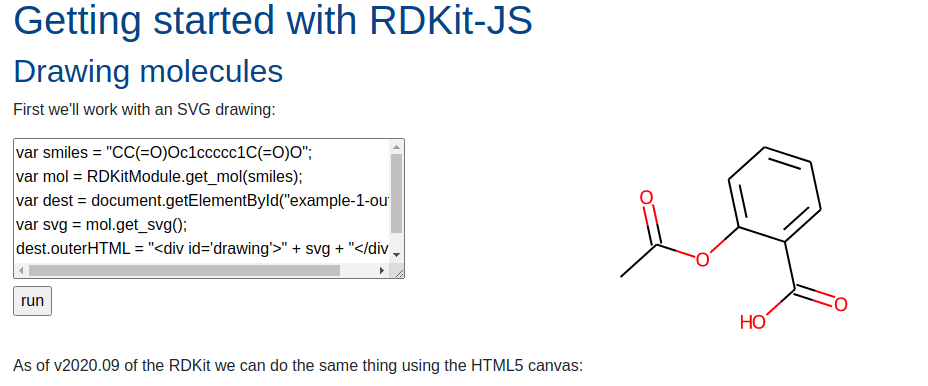

There's a link to a running version on the NPM pages

# New things in Contrib

- **NIBRStructureFilters** (2021.03 release): python script and SMARTS patterns for a set of structural filters published by Novartis (https://dx.doi.org/10.1021/acs.jmedchem.0c01332). Contribution from Nadine Schneider
- **CalcLigRMSD** (2021.03 release): python script and jupyter notebook for flexible RMSD alignment of of molecules and proteins. Contribution from Carmen Esposito.
- **FreeWilson** (2021.09 release): python scripts for Free-Wilson analysis, including enumeration/scoring of new compounds. Contribution from Brian Kelley

# New Features


## CFFI library

Exposing the functionality of the RDKit's MinimalLib (used for the RDKitJS wrappers) to allow usage from any other programming language which supports cffi.

More information in the blog post:
https://greglandrum.github.io/rdkit-blog/technical/2021/05/01/rdkit-cffi-part1.html


## PostgreSQL Cartridge improvements
(2021.09 release)

- update script allowing updating an install from v3.8->v4.0 of the cartridge without needing to drop the extensions
- `rdkit_toolkit_version()` function available
- support for the rdkit's commonchem JSON format
- enhanced stereo support in substructure search
- chiral substructure search functions added (no global variables required)
- better support for qmols: 
  - you can now build indices on columns containing query molecules
  - `mol_adjust_query_properties(qmol)` available
  - `mol_to_svg(qmol)` available
  - casting from mol -> qmol available
  

In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import rdkit
print(rdkit.__version__)

2021.09.1b1


## MolZip
(2021.03 release)

This piece of utility function makes it easy to combine molecules which have attachment points indicated with dummy atoms.

It works great with RGroup decomposition output, which I'll demo with a set of compounds from a recent J Med Chem paper:

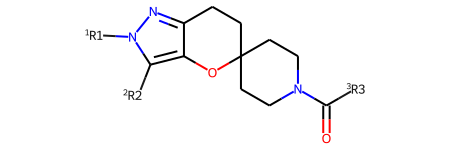

In [2]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import rdRGroupDecomposition
with Chem.ForwardSDMolSupplier('./data/RGD_sets/data/jm201503u.sdf') as suppl:
    ms = [x for x in suppl if x is not None]
core = ms[0]
ms.pop(0)
core

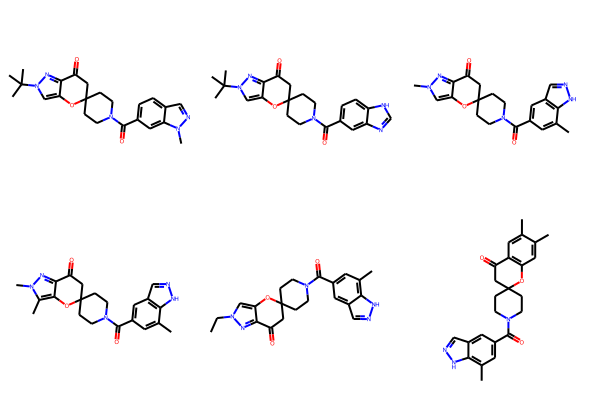

In [3]:
Draw.MolsToGridImage(ms[:6])

Run RGD on those molecules:

In [4]:
ps = rdRGroupDecomposition.RGroupDecompositionParameters()
#ps.onlyMatchAtRGroups = True
rgd_res,failed = rdRGroupDecomposition.RGroupDecompose([core],ms,asSmiles=True,
                                                       asRows=False,options=ps)
rgd_res

RDKit DEBUG: [08:06:58] No core matches
[08:06:58] No core matches


{'Core': ['O=C(N1CCC2(CC1)CC([*:4])c1nn([*:1])c([*:2])c1O2)[*:3]',
  'O=C(N1CCC2(CC1)CC([*:4])c1nn([*:1])c([*:2])c1O2)[*:3]',
  'O=C(N1CCC2(CC1)CC([*:4])c1nn([*:1])c([*:2])c1O2)[*:3]',
  'O=C(N1CCC2(CC1)CC([*:4])c1nn([*:1])c([*:2])c1O2)[*:3]',
  'O=C(N1CCC2(CC1)CC([*:4])c1nn([*:1])c([*:2])c1O2)[*:3]',
  'O=C(N1CCC2(CC1)CC([*:4])c1nn([*:1])c([*:2])c1O2)[*:3]',
  'O=C(N1CCC2(CC1)CC([*:4])c1nn([*:1])c([*:2])c1O2)[*:3]',
  'O=C(N1CCC2(CC1)CC([*:4])c1nn([*:1])c([*:2])c1O2)[*:3]',
  'O=C(N1CCC2(CC1)CC([*:4])c1nn([*:1])c([*:2])c1O2)[*:3]',
  'O=C(N1CCC2(CC1)CC([*:4])c1nn([*:1])c([*:2])c1O2)[*:3]',
  'O=C(N1CCC2(CC1)CC([*:4])c1nn([*:1])c([*:2])c1O2)[*:3]',
  'O=C(N1CCC2(CC1)CC([*:4])c1nn([*:1])c([*:2])c1O2)[*:3]',
  'O=C(N1CCC2(CC1)CC([*:4])c1nn([*:1])c([*:2])c1O2)[*:3]',
  'O=C(N1CCC2(CC1)CC([*:4])c1nn([*:1])c([*:2])c1O2)[*:3]',
  'O=C(N1CCC2(CC1)CC([*:4])c1nn([*:1])c([*:2])c1O2)[*:3]',
  'O=C(N1CCC2(CC1)CC([*:4])c1nn([*:1])c([*:2])c1O2)[*:3]',
  'O=C(N1CCC2(CC1)CC([*:4])c1nn([*:1])c([*:2])c1

And now let's enumerate all possible combinations of R groups, create the corresponding molecules, and remove anything which was in the paper:

260 mols total, 233 are unique


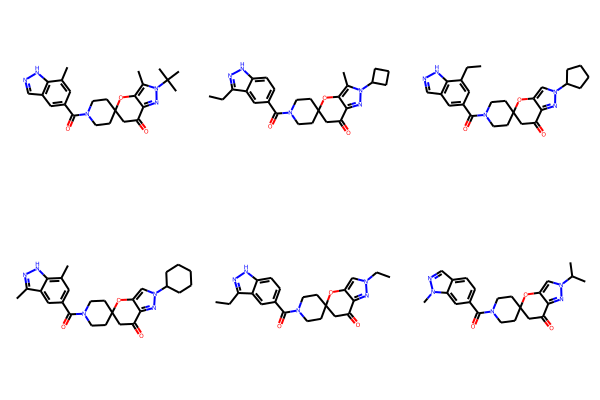

In [5]:
# ----------------------------
#   Generate all possible combinations of R groups using itertools:
import itertools,random
from rdkit import RDLogger
all_chains = [set(y) for x,y in rgd_res.items() if x.startswith('R')]
random.seed(0xf00d)
combos = [x for x in itertools.product(*all_chains)]
random.shuffle(combos)
RDLogger.DisableLog('rdApp.warning')
chain_combos = [Chem.MolFromSmiles('.'.join(tpl)) for tpl in combos]
RDLogger.EnableLog('rdApp.warning')

# ----------------------------
#   Make molecules using molzip:
ncore = Chem.MolFromSmiles(rgd_res['Core'][0])
combined = [Chem.molzip(ncore,chains) for chains in chain_combos]
for i,mol in enumerate(combined):
    combined[i] = Chem.RemoveHs(mol)

# ----------------------------
#   Remove the molecules which were in the paper:
smi_seen=set([Chem.MolToSmiles(x) for x in ms])
unique=[]
for m in combined:
    smi = Chem.MolToSmiles(m)
    if smi not in smi_seen:
        unique.append(m)
        smi_seen.add(smi)
        
        
# ----------------------------
#   show the results
print(f'{len(combined)} mols total, {len(unique)} are unique')
Draw.MolsToGridImage(unique[:6])

## MolDraw2D improvements
(ongoing, this example shows features added for 2020.09, 2021.03, and 2021.09)


In [6]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdDepictor
IPythonConsole.molSize = 300,250

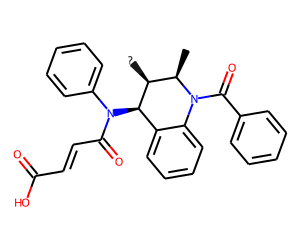

In [7]:
from rdkit import Chem
mol = Chem.MolFromSmiles('C[C@@H]1[C@H](*)[C@H](N(C(=O)/C=C/C(O)=O)C2=CC=CC=C2)C2=CC=CC=C2N1C(=O)C1=CC=CC=C1 |&1:1,4|')
mol

In [8]:
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
import ipywidgets as widgets
from ipywidgets import interact,fixed
from IPython.display import SVG,Image

@interact(mol=fixed(mol),)
def show_mol(mol,useSVG=True,addAtomIndices=False,addBondIndices=False,addStereoAnnotation=False,explicitMethyl=False,
         dummiesAreAttachments=False,blackAndWhite=False,comicMode=False,
             minFontSize="4",maxFontSize="40",legend=""):
    if useSVG:
        d = rdMolDraw2D.MolDraw2DSVG(450,400)
    else:
        d = rdMolDraw2D.MolDraw2DCairo(450,400)
    dos = d.drawOptions()
    dos.addAtomIndices=addAtomIndices
    dos.addBondIndices=addBondIndices
    dos.addStereoAnnotation = addStereoAnnotation
    dos.explicitMethyl = explicitMethyl
    dos.dummiesAreAttachments = dummiesAreAttachments
    dos.minFontSize = int(minFontSize)
    dos.maxFontSize = int(maxFontSize)
    if blackAndWhite:
        dos.useBWAtomPalette()
    if comicMode:
        Draw.SetComicMode(dos)
    d.DrawMolecule(mol,legend=legend)
    d.FinishDrawing()
    if useSVG:
        return SVG(d.GetDrawingText())
    else:
        return Image(d.GetDrawingText())

interactive(children=(Checkbox(value=True, description='useSVG'), Checkbox(value=False, description='addAtomIn…

### Improved rendering of query features

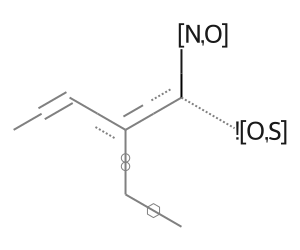

In [9]:
IPythonConsole.molSize = 300,250
qmol = Chem.MolFromMolBlock('''
  Mrv2108 10122106102D          

  0  0  0     0  0            999 V3000
M  V30 BEGIN CTAB
M  V30 COUNTS 8 7 0 0 0
M  V30 BEGIN ATOM
M  V30 1 C -9.9166 2.25 0 0
M  V30 2 C -8.5829 3.02 0 0
M  V30 3 C -7.2492 2.25 0 0
M  V30 4 C -5.9155 3.02 0 0
M  V30 5 "NOT [O,S]" -4.5819 2.25 0 0
M  V30 6 [N,O] -5.9155 4.5599 0 0
M  V30 7 C -7.2492 0.71 0 0
M  V30 8 C -5.9155 -0.06 0 0
M  V30 END ATOM
M  V30 BEGIN BOND
M  V30 1 1 4 6
M  V30 2 5 1 2
M  V30 3 6 2 3
M  V30 4 7 3 4
M  V30 5 8 4 5
M  V30 6 1 3 7 TOPO=2
M  V30 7 1 7 8 TOPO=1
M  V30 END BOND
M  V30 END CTAB
M  END
''')
qmol

### Rendering additional information from v3000 mol blocks

data fields

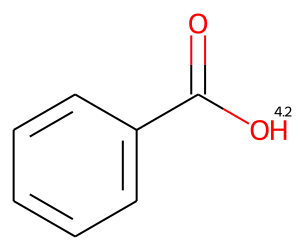

In [10]:
m = Chem.MolFromMolBlock('''
  Mrv2014 12072015352D          

  0  0  0     0  0            999 V3000
M  V30 BEGIN CTAB
M  V30 COUNTS 9 9 1 0 0
M  V30 BEGIN ATOM
M  V30 1 C -6.5833 4.3317 0 0
M  V30 2 C -7.917 3.5617 0 0
M  V30 3 C -7.917 2.0216 0 0
M  V30 4 C -6.5833 1.2516 0 0
M  V30 5 C -5.2497 2.0216 0 0
M  V30 6 C -5.2497 3.5617 0 0
M  V30 7 C -3.916 4.3317 0 0
M  V30 8 O -3.916 5.8717 0 0
M  V30 9 O -2.5823 3.5617 0 0
M  V30 END ATOM
M  V30 BEGIN BOND
M  V30 1 1 1 2
M  V30 2 2 2 3
M  V30 3 1 3 4
M  V30 4 2 4 5
M  V30 5 1 5 6
M  V30 6 2 1 6
M  V30 7 1 6 7
M  V30 8 2 7 8
M  V30 9 1 7 9
M  V30 END BOND
M  V30 BEGIN SGROUP
M  V30 1 DAT 0 ATOMS=(1 9) FIELDNAME=pKa -
M  V30 FIELDDISP="    0.4000    0.4000    DRU   ALL  0       0" -
M  V30 MRV_FIELDDISP=0 FIELDDATA=4.2
M  V30 END SGROUP
M  V30 END CTAB
M  END''')
m

polymer brackets

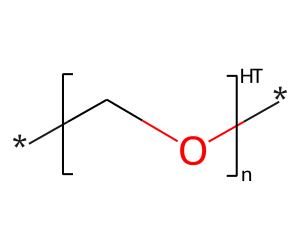

In [11]:
sru_mol = Chem.MolFromMolBlock('''
  ACCLDraw05132106232D

  0  0  0     0  0            999 V3000
M  V30 BEGIN CTAB
M  V30 COUNTS 4 3 1 0 0
M  V30 BEGIN ATOM
M  V30 1 C 9.7578 -7.0211 0 0 
M  V30 2 O 10.7757 -7.6201 0 0 
M  V30 3 * 11.8037 -7.0378 0 0 
M  V30 4 * 8.7298 -7.6034 0 0 
M  V30 END ATOM
M  V30 BEGIN BOND
M  V30 1 1 1 2 
M  V30 2 1 2 3 
M  V30 3 1 1 4 
M  V30 END BOND
M  V30 BEGIN SGROUP
M  V30 1 SRU 1 ATOMS=(2 2 1) XBONDS=(2 3 2) BRKXYZ=(9 9.24 -7.9 0 9.24 -6.72 -
M  V30 0 0 0 0) BRKXYZ=(9 11.29 -6.74 0 11.29 -7.92 0 0 0 0) CONNECT=HT -
M  V30 LABEL=n 
M  V30 END SGROUP
M  V30 END CTAB
M  END''')
sru_mol

position variation bonds

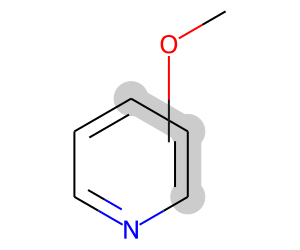

In [12]:
position_variation_mol = Chem.MolFromMolBlock('''
  Mrv2007 06232015292D          

  0  0  0     0  0            999 V3000
M  V30 BEGIN CTAB
M  V30 COUNTS 9 8 0 0 0
M  V30 BEGIN ATOM
M  V30 1 C -1.7083 2.415 0 0
M  V30 2 C -3.042 1.645 0 0
M  V30 3 C -3.042 0.105 0 0
M  V30 4 N -1.7083 -0.665 0 0
M  V30 5 C -0.3747 0.105 0 0
M  V30 6 C -0.3747 1.645 0 0
M  V30 7 * -0.8192 1.3883 0 0
M  V30 8 O -0.8192 3.6983 0 0
M  V30 9 C 0.5145 4.4683 0 0
M  V30 END ATOM
M  V30 BEGIN BOND
M  V30 1 1 1 2
M  V30 2 2 2 3
M  V30 3 1 3 4
M  V30 4 2 4 5
M  V30 5 1 5 6
M  V30 6 2 1 6
M  V30 7 1 7 8 ENDPTS=(3 1 5 6) ATTACH=ANY
M  V30 8 1 8 9
M  V30 END BOND
M  V30 END CTAB
M  END''')
position_variation_mol

link nodes

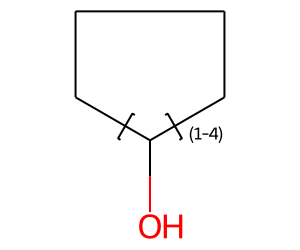

In [13]:
linknode_mol = Chem.MolFromMolBlock('''one linknode
  Mrv2007 06222005102D          

  0  0  0     0  0            999 V3000
M  V30 BEGIN CTAB
M  V30 COUNTS 6 6 0 0 0
M  V30 BEGIN ATOM
M  V30 1 C 8.25 12.1847 0 0
M  V30 2 C 6.9164 12.9547 0 0
M  V30 3 C 6.9164 14.4947 0 0
M  V30 4 C 9.5836 14.4947 0 0
M  V30 5 C 9.5836 12.9547 0 0
M  V30 6 O 8.25 10.6447 0 0
M  V30 END ATOM
M  V30 BEGIN BOND
M  V30 1 1 1 2
M  V30 2 1 2 3
M  V30 3 1 4 5
M  V30 4 1 1 5
M  V30 5 1 3 4
M  V30 6 1 1 6
M  V30 END BOND
M  V30 LINKNODE 1 4 2 1 2 1 5
M  V30 END CTAB
M  END''')
linknode_mol

### Storing molecule metadata in PNGs
(2020.09 release)

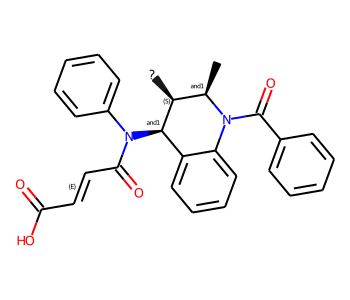

In [14]:
d2d = rdMolDraw2D.MolDraw2DCairo(350,300)
d2d.drawOptions().addStereoAnnotation = True
d2d.DrawMolecule(mol)
d2d.FinishDrawing()
png = d2d.GetDrawingText()
Image(png)

*[C@@H]1[C@H](N(C(=O)/C=C/C(=O)O)c2ccccc2)c2ccccc2N(C(=O)c2ccccc2)[C@@H]1C |(-0.919531,3.13719,;0.0396163,1.98392,;-0.479573,0.576636,;-1.95791,0.322627,;-2.4771,-1.08466,;-1.51795,-2.23793,;-3.95544,-1.33866,;-4.47463,-2.74595,;-5.95296,-2.99996,;-6.91211,-1.84668,;-6.47215,-4.40724,;-2.91706,1.4759,;-2.39787,2.88318,;-3.35701,4.03645,;-4.83535,3.78244,;-5.35454,2.37516,;-4.39539,1.22189,;0.479573,-0.576636,;-0.0396163,-1.98392,;0.919531,-3.13719,;2.39787,-2.88318,;2.91706,-1.4759,;1.95791,-0.322627,;2.4771,1.08466,;3.95544,1.33866,;4.47463,2.74595,;4.91458,0.185392,;4.39539,-1.22189,;5.35454,-2.37516,;6.83288,-2.12115,;7.35207,-0.713871,;6.39292,0.439401,;1.51795,2.23793,;2.03714,3.64521,),&1:2,32|


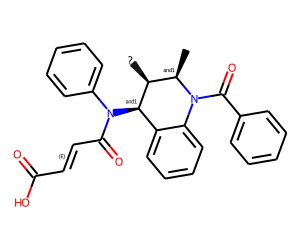

In [15]:
IPythonConsole.drawOptions.addStereoAnnotation=True
newMol = Chem.MolFromPNGString(png)
print(Chem.MolToCXSmiles(newMol))
newMol

It also works with multiple molecules:

In [16]:
# flucloxacillin
flu = Chem.MolFromSmiles('Cc1onc(-c2c(F)cccc2Cl)c1C(=O)N[C@@H]1C(=O)N2[C@@H](C(=O)O)C(C)(C)S[C@H]12')
# ampicillin
amp = Chem.MolFromSmiles('CC1(C)S[C@@H]2[C@H](NC(=O)[C@H](N)c3ccccc3)C(=O)N2[C@H]1C(=O)O')
# penicillin
pen = Chem.MolFromSmiles('CC1(C)SC2C(NC(=O)Cc3ccccc3)C(=O)N2C1C(=O)O.[Na]')
# oxacillin
ox = Chem.MolFromSmiles('Cc1onc(-c2ccccc2)c1C(=O)N[C@@H]1C(=O)N2[C@@H](C(=O)O)C(C)(C)S[C@H]12')

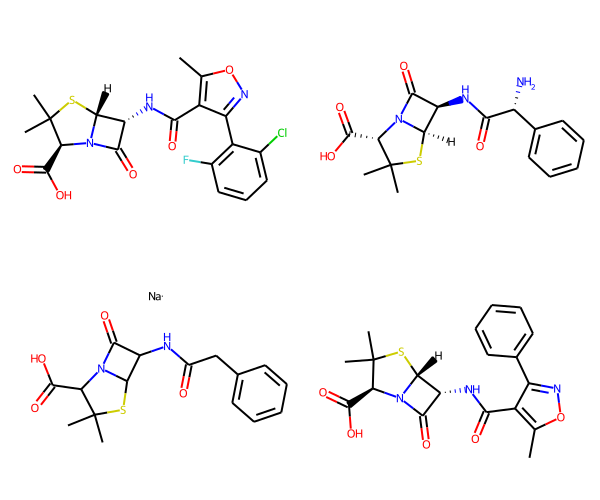

In [17]:
d2d = rdMolDraw2D.MolDraw2DCairo(600,500,300,250)
d2d.DrawMolecules((flu,amp,pen,ox))
d2d.FinishDrawing()
png = d2d.GetDrawingText()
Image(png)

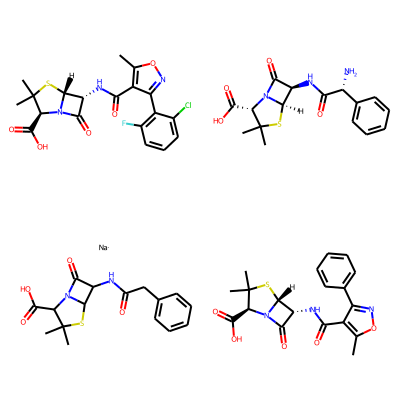

In [18]:
mols = Chem.MolsFromPNGString(png)
Draw.MolsToGridImage(mols,molsPerRow=2)

And reactions

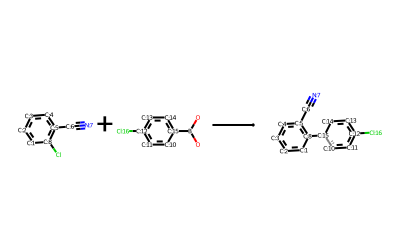

In [19]:
from rdkit.Chem import rdChemReactions
rxn = rdChemReactions.ReactionFromSmarts("[cH:1]:1:[cH:2]:[cH:3]:[cH:4]:[cH:5](-[C:6]#[N:7]):[c:8]:1-[Cl].\
[cH:10]:1:[cH:11]:[cH:12](-[Cl:16]):[cH:13]:[cH:14]:[cH:15]:1-B(-O)-O>>\
[cH:1]:1:[cH:2]:[cH:3]:[cH:4]:[cH:5](-[C:6]#[N:7]):[c:8]:1-[cH:15]:1[cH:10]:[cH:11]:[cH:12](-[Cl:16]):[cH:13]:[cH:14]:1")
rxn

In [20]:
d2d = rdMolDraw2D.MolDraw2DCairo(600,300)
d2d.DrawReaction(rxn)
d2d.FinishDrawing()
png = d2d.GetDrawingText()

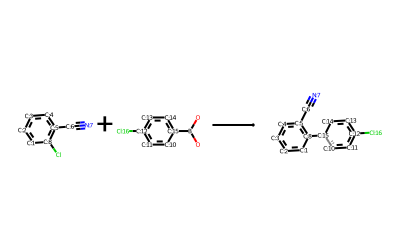

In [21]:
nrxn = rdChemReactions.ReactionFromPNGString(png)
nrxn

And there are functions there to store/retrieve additional metadata. This currently only supports adding strings.

In [22]:
props = {'yield':'83%','solvent':'dioxane','catalyst':'NiCl2(dppp), K3PO4'}
npng = Chem.AddMetadataToPNGString(props,png)
nprops = Chem.MetadataFromPNGString(npng)
nprops.keys()

dict_keys(['rdkitReactionPKL rdkit 2021.09.1b1', 'ReactionSmarts rdkit 2021.09.1b1', 'yield', 'solvent', 'catalyst'])

For technical reasons, the results come back as `bytes` objects:

In [23]:
nprops['yield']

b'83%'

## SubstructLibrary improvements
(2021.09 and 2021.03)

The SubstructLibrary now supports:
- setting the search order
- tautomer and molbundle queries
- using `SubstructMatchParameters`

**NOTE:** this section of the notebook does not work in binder.


In [24]:
import time
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import rdSubstructLibrary

In [25]:
import pickle
with open('./data/demo_ssslib.pkl','rb') as inf:
    slib = pickle.load(inf)

1000 results


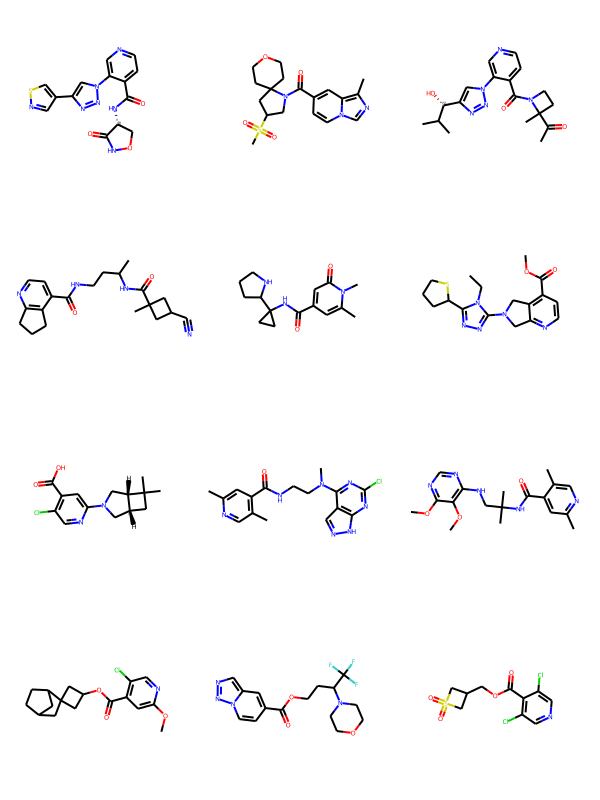

In [26]:
mids = slib.GetMatches(Chem.MolFromSmarts('[O,N]=Cc1ccncc1'))
print(f'{len(mids)} results')
ms = [slib.GetMolHolder().GetMol(x) for x in mids[:12]]
Draw.MolsToGridImage(ms)

We can change the search order:

1000 results


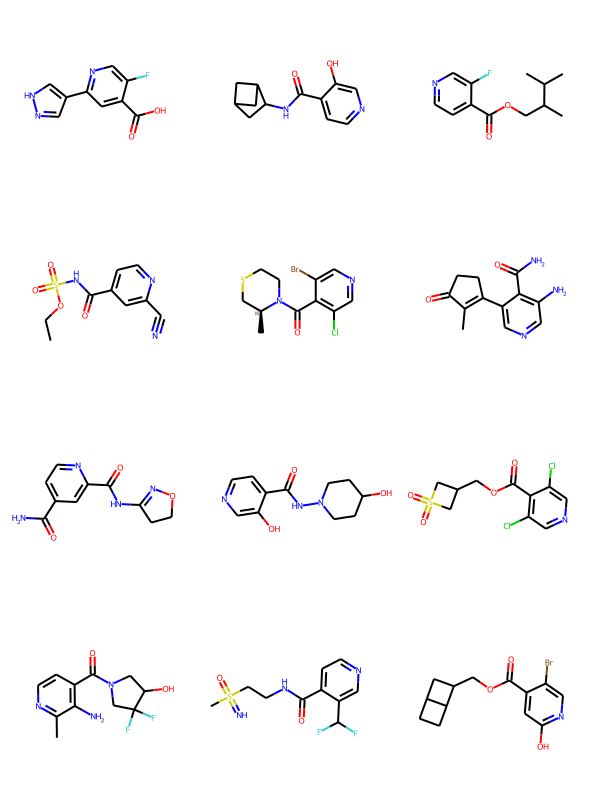

In [27]:
holder = slib.GetMolHolder()
nats = sorted([(holder.GetMol(x).GetNumAtoms(),x) for x in range(len(slib))])
order = [y for x,y in nats]
slib.SetSearchOrder(order)
mids = slib.GetMatches(Chem.MolFromSmarts('[O,N]=Cc1ccncc1'))
print(f'{len(mids)} results')
ms = [slib.GetMolHolder().GetMol(x) for x in mids[:12]]
Draw.MolsToGridImage(ms)

This also allows us to limit where we search.

In this example I just do the search across molecules which have less than 17 atoms

3 results


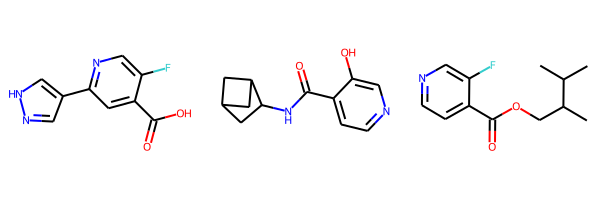

In [28]:
order = [y for x,y in nats if x<17]
slib.SetSearchOrder(order)
mids = slib.GetMatches(Chem.MolFromSmarts('[O,N]=Cc1ccncc1'))
print(f'{len(mids)} results')
ms = [slib.GetMolHolder().GetMol(x) for x in mids[:12]]
Draw.MolsToGridImage(ms)

We can also search with a MolBundle:

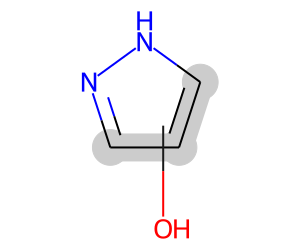

In [29]:
qry = Chem.MolFromMolBlock('''
  Mrv2108 10072115572D          

  0  0  0     0  0            999 V3000
M  V30 BEGIN CTAB
M  V30 COUNTS 7 6 0 0 0
M  V30 BEGIN ATOM
M  V30 1 N -1.9167 -4.815 0 0
M  V30 2 N -3.1625 -5.7202 0 0
M  V30 3 C -2.6867 -7.1848 0 0
M  V30 4 C -1.1467 -7.1848 0 0
M  V30 5 C -0.6708 -5.7202 0 0
M  V30 6 * -1.5014 -6.6966 0 0
M  V30 7 O -1.5014 -9.0066 0 0
M  V30 END ATOM
M  V30 BEGIN BOND
M  V30 1 1 1 2
M  V30 2 1 3 4
M  V30 3 1 1 5
M  V30 4 2 2 3
M  V30 5 2 4 5
M  V30 6 1 6 7 ENDPTS=(3 3 4 5) ATTACH=ANY
M  V30 END BOND
M  V30 END CTAB
M  END
''')
qry

In [30]:
from rdkit.Chem import rdMolEnumerator
qbndl = rdMolEnumerator.Enumerate(qry)

26 results


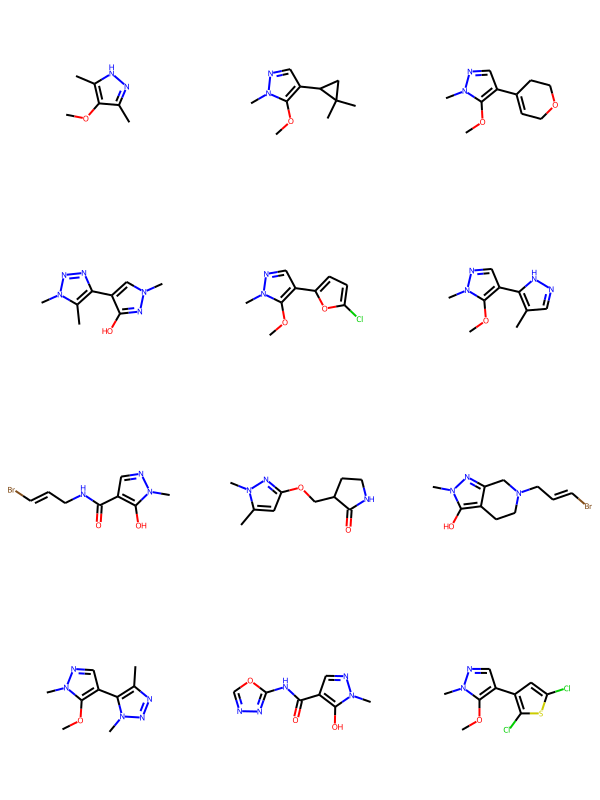

In [31]:
mids = slib.GetMatches(qbndl)
print(f'{len(mids)} results')
ms = [slib.GetMolHolder().GetMol(x) for x in mids[:12]]
Draw.MolsToGridImage(ms)

Tautomer queries work as well:

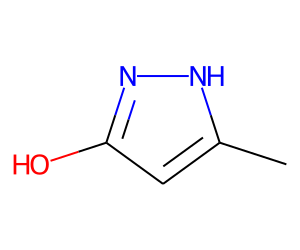

In [32]:
qmol = Chem.MolFromSmiles('Cc1[nH]nc(O)c1')
qmol

2 results


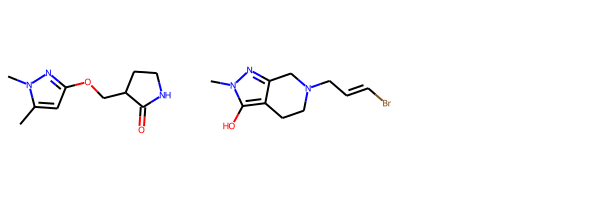

In [33]:
mids = slib.GetMatches(qmol)
print(f'{len(mids)} results')
ms = [slib.GetMolHolder().GetMol(x) for x in mids[:12]]
Draw.MolsToGridImage(ms)

4 results


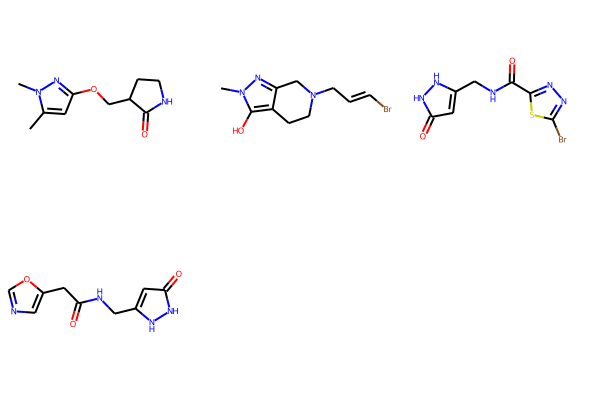

In [34]:
from rdkit.Chem import rdTautomerQuery
tq = rdTautomerQuery.TautomerQuery(qmol)
mids = slib.GetMatches(tq)
print(f'{len(mids)} results')
ms = [slib.GetMolHolder().GetMol(x) for x in mids[:12]]
Draw.MolsToGridImage(ms)

Using SubstructMatchParameters:

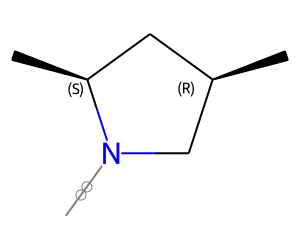

In [35]:
qmol = Chem.MolFromMolBlock('''
  Mrv2108 10072116132D          

  0  0  0     0  0            999 V3000
M  V30 BEGIN CTAB
M  V30 COUNTS 8 8 0 0 0
M  V30 BEGIN ATOM
M  V30 1 C -1.4583 0.2267 0 0
M  V30 2 C -2.7042 -0.6786 0 0 CFG=1
M  V30 3 N -2.2283 -2.1431 0 0
M  V30 4 C -0.6883 -2.1431 0 0
M  V30 5 C -0.2125 -0.6786 0 0 CFG=2
M  V30 6 C -4.1688 -0.2027 0 0
M  V30 7 C 1.2522 -0.2027 0 0
M  V30 8 C -3.1335 -3.389 0 0
M  V30 END ATOM
M  V30 BEGIN BOND
M  V30 1 1 1 2
M  V30 2 1 2 3
M  V30 3 1 3 4
M  V30 4 1 4 5
M  V30 5 1 1 5
M  V30 6 1 2 6 CFG=1
M  V30 7 1 5 7 CFG=1
M  V30 8 1 3 8 TOPO=2
M  V30 END BOND
M  V30 END CTAB
M  END
''')
qmol

19 results


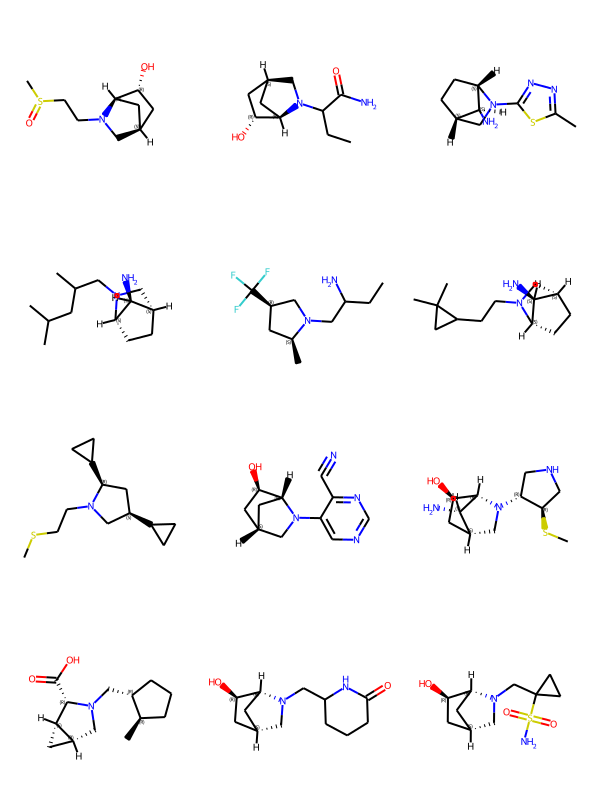

In [36]:
mids = slib.GetMatches(qmol)
print(f'{len(mids)} results')
ms = [slib.GetMolHolder().GetMol(x) for x in mids[:12]]
Draw.MolsToGridImage(ms)

119 results


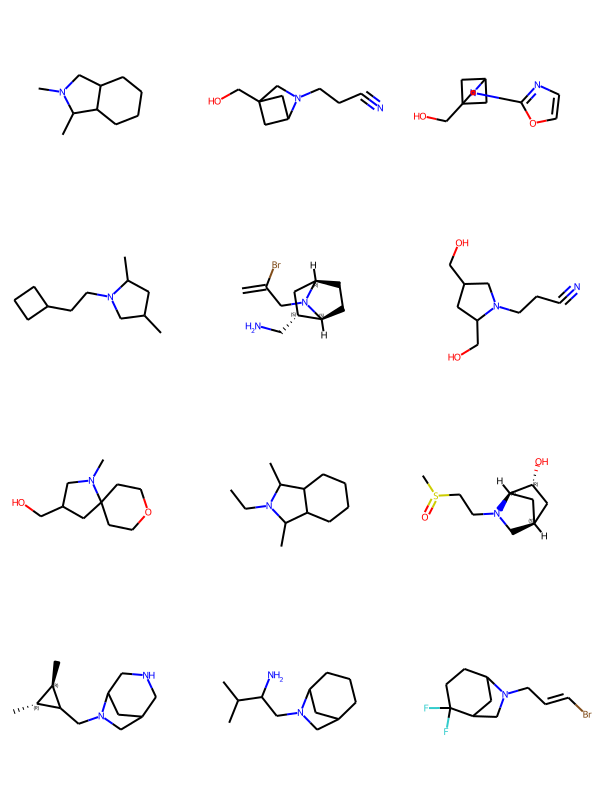

In [37]:
ps = Chem.SubstructMatchParameters()
ps.useChirality = False
mids = slib.GetMatches(qmol,ps)
print(f'{len(mids)} results')
ms = [slib.GetMolHolder().GetMol(x) for x in mids[:12]]
Draw.MolsToGridImage(ms)

## Jupyter integration improvements
(2021.09 release)


### MolBundle rendering

The molecules which make up a `MolBundle` are now rendered in a grid if the `MolBundle` is the last element in a notebook cell:

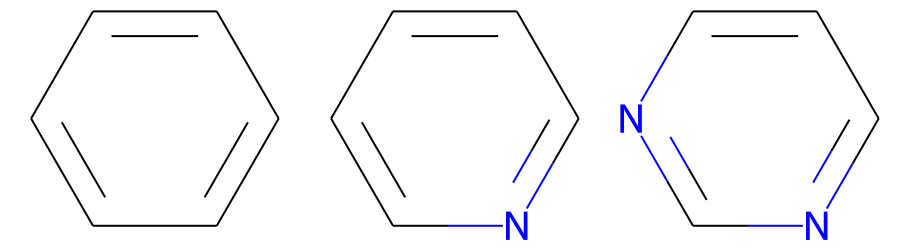

In [38]:
ms = [Chem.MolFromSmiles(smi) for smi in ('c1ccccc1','c1ncccc1','c1ncncc1')]
bndl = Chem.MolBundle()
for m in ms:
    bndl.AddMol(m)
bndl

### Molecule property display

If a molecule has properties associated with it, they will now by default be displayed with the molecule in the notebook:

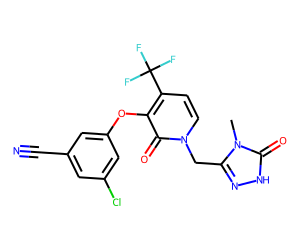

In [39]:
from rdkit.Chem import Descriptors
doravirine = Chem.MolFromSmiles('Cn1c(n[nH]c1=O)Cn2ccc(c(c2=O)Oc3cc(cc(c3)Cl)C#N)C(F)(F)F')
doravirine.SetProp('_Name','CHEMBL2364608')
doravirine.SetProp('USAN','Doravirine')
doravirine.SetDoubleProp('AMW',Descriptors.MolWt(doravirine))
doravirine.SetProp('Formula',Descriptors.rdMolDescriptors.CalcMolFormula(doravirine))
doravirine

There are times when this can be overwhelming (thanks to Paolo for the example):

{'PUBCHEM_COMPOUND_CID': 185460, 'PUBCHEM_COMPOUND_CANONICALIZED': 1, 'PUBCHEM_CACTVS_COMPLEXITY': 641, 'PUBCHEM_CACTVS_HBOND_ACCEPTOR': 5, 'PUBCHEM_CACTVS_HBOND_DONOR': 1, 'PUBCHEM_CACTVS_ROTATABLE_BOND': 10, 'PUBCHEM_CACTVS_SUBSKEYS': 'AAADcfB7MAAAAAAAAAAAAAAAAAAAAWAAAAA8YIAAAAAAAFgB9AAAHgAACAAADwjhnwYz2LcMFgCoAybybACCgC0hEqAJ2CE4dJiKaLLAnZGXYAhswAPYyCeYyOCPwAAAAAAAACCAAAAAAAAAQAAAAAAAAA==', 'PUBCHEM_IUPAC_OPENEYE_NAME': '2-[4-[2-[4-[1-(2-ethoxyethyl)benzimidazol-2-yl]-1-piperidyl]ethyl]phenyl]-2-methyl-propanoic acid', 'PUBCHEM_IUPAC_CAS_NAME': '2-[4-[2-[4-[1-(2-ethoxyethyl)-2-benzimidazolyl]-1-piperidinyl]ethyl]phenyl]-2-methylpropanoic acid', 'PUBCHEM_IUPAC_NAME_MARKUP': '2-[4-[2-[4-[1-(2-ethoxyethyl)benzimidazol-2-yl]piperidin-1-yl]ethyl]phenyl]-2-methylpropanoic acid', 'PUBCHEM_IUPAC_NAME': '2-[4-[2-[4-[1-(2-ethoxyethyl)benzimidazol-2-yl]piperidin-1-yl]ethyl]phenyl]-2-methylpropanoic acid', 'PUBCHEM_IUPAC_SYSTEMATIC_NAME': '2-[4-[2-[4-[1-(2-ethoxyethyl)benzimidazol-2-yl]piperidi

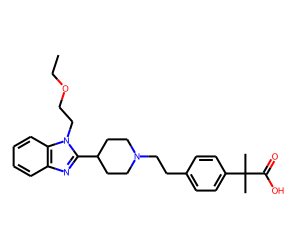

In [41]:
import requests
from io import BytesIO

bilastine_pubchem = 'https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/CID/185460/record/SDF/?record_type=2d&response_type=save&response_basename=Structure2D_CID_185460'
response = requests.get(bilastine_pubchem, allow_redirects=True)
buf = BytesIO(response.content)
with Chem.ForwardSDMolSupplier(buf) as suppl:
    mol = next(suppl)
print(mol.GetPropsAsDict())
mol

You can change the maximum number of properties displayed:

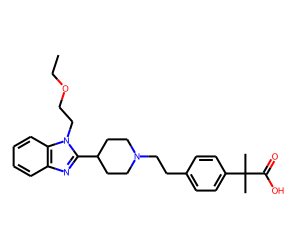

In [42]:
IPythonConsole.ipython_maxProperties = -1
mol

You can turn this rendering off completely if you want to:

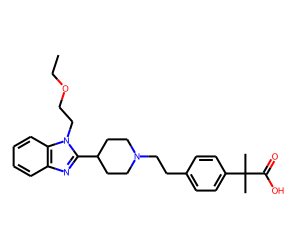

In [43]:
IPythonConsole.ipython_showProperties = False
mol

In [44]:
IPythonConsole.ipython_showProperties = True
IPythonConsole.ipython_maxProperties = 10

## Abbreviations
(2020.09 release)


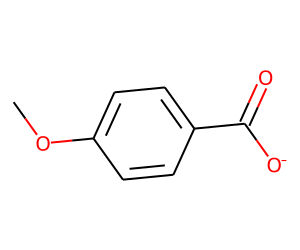

In [45]:
m = Chem.MolFromSmiles('COc1ccc(C(=O)[O-])cc1')
m

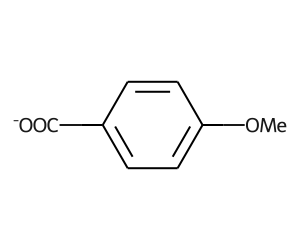

In [46]:
from rdkit.Chem import rdAbbreviations
abbrevs = rdAbbreviations.GetDefaultAbbreviations()
nm = rdAbbreviations.CondenseMolAbbreviations(m,abbrevs)
nm

Abbreviations that cover more than 40% of the molecule won't be applied by default:

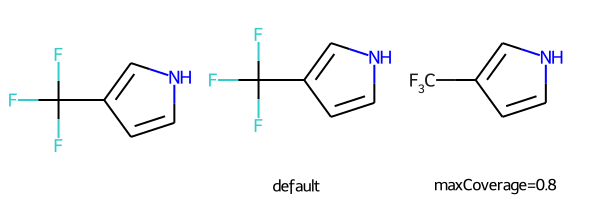

In [47]:
m = Chem.MolFromSmiles('c1c[nH]cc1C(F)(F)F')
nm1 = rdAbbreviations.CondenseMolAbbreviations(m,abbrevs)
nm2 = rdAbbreviations.CondenseMolAbbreviations(m,abbrevs,maxCoverage=0.8)
Draw.MolsToGridImage((m,nm1,nm2),legends=('','default','maxCoverage=0.8'))

Can also annotate the abbreviation info as SGroups:

In [48]:
m = Chem.MolFromSmiles('CC(F)(F)F')
nm = rdAbbreviations.LabelMolAbbreviations(m,abbrevs,maxCoverage=1)
print(Chem.MolToV3KMolBlock(nm))


     RDKit          2D

  0  0  0  0  0  0  0  0  0  0999 V3000
M  V30 BEGIN CTAB
M  V30 COUNTS 5 4 1 0 0
M  V30 BEGIN ATOM
M  V30 1 C 0.000000 0.000000 0.000000 0
M  V30 2 C 1.299038 0.750000 0.000000 0
M  V30 3 F 2.598076 1.500000 0.000000 0
M  V30 4 F 2.049038 -0.549038 0.000000 0
M  V30 5 F 0.549038 2.049038 0.000000 0
M  V30 END ATOM
M  V30 BEGIN BOND
M  V30 1 1 1 2
M  V30 2 1 2 3
M  V30 3 1 2 4
M  V30 4 1 2 5
M  V30 END BOND
M  V30 BEGIN SGROUP
M  V30 1 SUP 0 ATOMS=(4 2 3 4 5) XBONDS=(1 1) LABEL=CF3 SAP=(3 2 1 1)
M  V30 END SGROUP
M  V30 END CTAB
M  END



And condense Sgroup abbreviations:

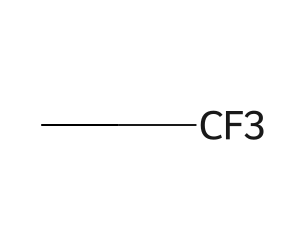

In [49]:
nm2 = rdAbbreviations.CondenseAbbreviationSubstanceGroups(nm)
nm2

## Tautomer-insensitive searching
(2020.09 release)

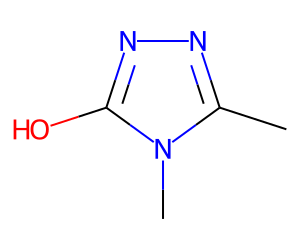

In [50]:
from rdkit.Chem import rdTautomerQuery
tm = Chem.MolFromSmiles('Cn1c(nnc1O)C')
tm

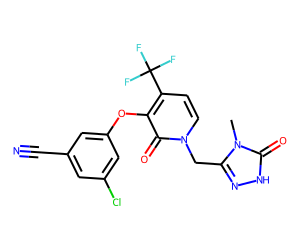

In [51]:
doravirine = Chem.MolFromSmiles('Cn1c(n[nH]c1=O)Cn2ccc(c(c2=O)Oc3cc(cc(c3)Cl)C#N)C(F)(F)F')
doravirine

In [52]:
doravirine.HasSubstructMatch(tm)

False

In [53]:
tq = rdTautomerQuery.TautomerQuery(tm)
tq.IsSubstructOf(doravirine)

True

In [54]:
matches = tq.GetSubstructMatches(doravirine)
matches

((0, 1, 2, 3, 4, 5, 6, 7),)

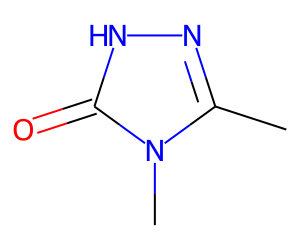

In [55]:
matches = tq.GetSubstructMatchesWithTautomers(doravirine)
matches[0][1]

In [56]:
Chem.MolToSmarts(tq.GetTemplateMolecule())

'[#6]-[#7]1-,=,:[#6](-,=,:[#7]-,=,:[#7]-,=,:[#6]-,=,:1-,=,:[#8])-,=,:[#6]'

### Tautomer-insensitive pattern fingerprints
Increases the efficiency when using pattern fingerprints to be used to do screenout with the tautomer-insensitive search code.

In [57]:
from rdkit import DataStructs
fp1 = Chem.PatternFingerprint(doravirine)
fp2 = Chem.PatternFingerprint(tq.GetTemplateMolecule())
print(fp2.GetNumOnBits(),DataStructs.AllProbeBitsMatch(fp2,fp1))

105 True


In [58]:
fp1 = Chem.PatternFingerprint(doravirine,tautomerFingerprints=True)
fp2 = Chem.PatternFingerprint(tq.GetTemplateMolecule(),tautomerFingerprints=True)
print(fp2.GetNumOnBits(),DataStructs.AllProbeBitsMatch(fp2,fp1))

145 True


## Additions to AdjustQueryProperties
(2020.09 release)

In [59]:
from IPython.display import HTML, display
def match_table(qs,ms,useChirality=False,includeSmarts=True,useEnhancedStereo=False):
    tbl = '<table>'
    tr = ['<td>Molecules in rows, Queries in columns</td>']
    smatr = ['<td></td>']
    for q in qs:
        d2d = Draw.MolDraw2DSVG(200,150)
        d2d.drawOptions().prepareMolsBeforeDrawing=False
        d2d.drawOptions().addStereoAnnotation = True
        d2d.DrawMolecule(q)
        d2d.FinishDrawing()
        svg = d2d.GetDrawingText()
        tr.append(f'<td>{svg}</td>')
        smatr.append(f'<td>{Chem.MolToSmarts(q)}</td>')
    tbl += f'<tr>{"".join(tr)}</tr>'
    if includeSmarts:
        tbl += f'<tr>{"".join(smatr)}</tr>'
    substructPs = Chem.SubstructMatchParameters()
    substructPs.useChirality = useChirality
    substructPs.useEnhancedStereo = useEnhancedStereo
    for m in ms:
        tr=[]
        d2d = Draw.MolDraw2DSVG(200,150)
        d2d.drawOptions().addStereoAnnotation = True
        d2d.DrawMolecule(m)
        d2d.FinishDrawing()
        svg = d2d.GetDrawingText()
        tr.append(f'<td>{svg}</td>')
        for q in qs:
            tr.append(f'<td style="text-align:center">{m.HasSubstructMatch(q,substructPs)}</td>')
        tbl += f'<tr>{"".join(tr)}</tr>'
        
    tbl += '</table>'
    return tbl

### 5-rings likely to cause problems with aromaticity

In [60]:
fivering_qs = [x for x in Chem.SDMolSupplier('./data/five_ring_queries.sdf')]

In [61]:
fivering_ms = [x for x in Chem.SDMolSupplier('./data/five_ring_mols.sdf')]

In [62]:
tbl = match_table(fivering_qs,fivering_ms)
display(HTML(tbl))

In [63]:
mqs = []
for q in fivering_qs:
    q1 = Chem.MergeQueryHs(q)
    ps = Chem.AdjustQueryParameters.NoAdjustments()
    ps.adjustConjugatedFiveRings = True
    q1 = Chem.AdjustQueryProperties(q1,ps)
    mqs.append(q1)
tbl = match_table(mqs,fivering_ms)
display(HTML(tbl))

### Single-atom neighbors to aromatic rings

In [64]:
aromaticNeighbor_qs = [x for x in Chem.SDMolSupplier('./data/aromatic_neighbors_queries.sdf')]
aromaticNeighbor_mols = [x for x in Chem.SDMolSupplier('./data/aromatic_neighbors_mols.sdf')]
tbl = match_table(aromaticNeighbor_qs,aromaticNeighbor_mols)
display(HTML(tbl))

In [65]:
mqs = []
for q in aromaticNeighbor_qs:
    q1 = Chem.MergeQueryHs(q)
    ps = Chem.AdjustQueryParameters.NoAdjustments()
    ps.adjustSingleBondsToDegreeOneNeighbors = True
    q1 = Chem.AdjustQueryProperties(q1,ps)
    mqs.append(q1)
tbl = match_table(mqs,aromaticNeighbor_mols)
display(HTML(tbl))

### Single bonds between aromatic atoms

In [66]:
aromaticBridge_qs = [x for x in Chem.SDMolSupplier('./data/aromatic_bridge_qs.sdf')]
aromaticBridge_mols = [x for x in Chem.SDMolSupplier('./data/aromatic_bridge_mols.sdf')]
tbl = match_table(aromaticBridge_qs,aromaticBridge_mols)
display(HTML(tbl))

In [67]:
mqs = []
for q in aromaticBridge_qs:
    q1 = Chem.MergeQueryHs(q)
    ps = Chem.AdjustQueryParameters.NoAdjustments()
    ps.adjustSingleBondsBetweenAromaticAtoms = True
    q1 = Chem.AdjustQueryProperties(q1,ps)
    mqs.append(q1)
tbl = match_table(mqs,aromaticBridge_mols)
display(HTML(tbl))

### "MDL" aromaticity

A special case for "A" atoms in aromatic five-rings

In [68]:
q = Chem.MolFromMolBlock('''
  Mrv1824 09252016342D          

  5  5  0  0  0  0            999 V2000
    6.4509    3.6482    0.0000 A   0  0  0  0  0  0  0  0  0  0  0  0
    5.7835    3.1633    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.0384    2.3787    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.8634    2.3787    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    7.1183    3.1633    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0  0  0  0
  2  3  2  0  0  0  0
  3  4  1  0  0  0  0
  4  5  2  0  0  0  0
  1  5  1  0  0  0  0
M  END
''')
Chem.MolToSmarts(q)

'[!#1]1:[#6]:[#6]:[#6]:[#6]:1'

In [69]:
q1 = Chem.MergeQueryHs(q)
ps = Chem.AdjustQueryParameters.NoAdjustments()
ps.setMDLFiveRingAromaticity = True
q1 = Chem.AdjustQueryProperties(q1,ps)
Chem.MolToSmarts(q1)

'[!#1]1-,:[#6]=,:[#6]-,:[#6]=,:[#6]-,:1'

## Improvements to coordgen integration
(2020.09 release)

In [70]:
from rdkit.Chem import rdCoordGen

First an example of why using CoordGen is desirable:

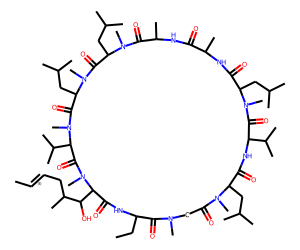

In [71]:
rdDepictor.SetPreferCoordGen(False)
cyclosporine = Chem.MolFromSmiles('C/C=C/CC(C)C(O)C1C(=O)NC(CC)C(=O)N(C)CC(=O)N(C)C(CC(C)C)C(=O)NC(C(C)C)C(=O)N(C)C(CC(C)C)C(=O)NC(C)C(=O)NC(C)C(=O)N(C)C(CC(C)C)C(=O)N(C)C(CC(C)C)C(=O)N(C)C(C(C)C)C(=O)N1C')
cyclosporine

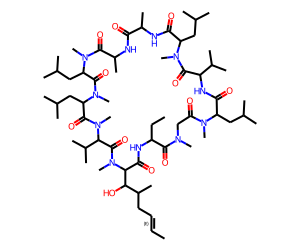

In [72]:
rdCoordGen.AddCoords(cyclosporine)
cyclosporine

### Changing `minimizerPrecision`

In order to speed up using coordgen, we've changed the default precision which is used when generating coordinates, but have also exposed a new parameter allowing you to change it back. Here are a couple of examples showing the impact

In [73]:
%timeit rdCoordGen.AddCoords(cyclosporine)

85.5 ms ± 695 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [74]:
ps = rdCoordGen.CoordGenParams()
ps.minimizerPrecision= ps.sketcherStandardPrecision # default is: ps.sketcherCoarsePrecision
%timeit rdCoordGen.AddCoords(cyclosporine,ps)

143 ms ± 4.73 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


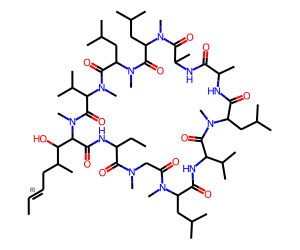

In [75]:
rdCoordGen.AddCoords(cyclosporine,ps)
cyclosporine

A more extreme example

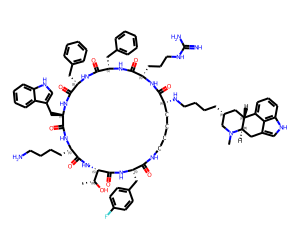

In [76]:
m = Chem.MolFromSmiles('C[C@@H](O)[C@@H]1NC(=O)[C@H](CCCCN)NC(=O)[C@@H](Cc2c[nH]c3ccccc23)NC(=O)[C@H](Cc2ccccc2)NC(=O)[C@H](Cc2ccccc2)NC(=O)[C@H](CCCNC(=N)N)NC(=O)[C@H](NCCCC[C@@H]2C[C@@H]3c4cccc5[nH]cc(c45)C[C@H]3N(C)C2)CCCCNC(=O)[C@H](Cc2ccc(F)cc2)NC1=O')
m

In [77]:
%timeit rdCoordGen.AddCoords(m)

146 ms ± 2.54 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


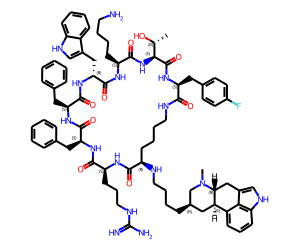

In [78]:
m

In [79]:
ps = rdCoordGen.CoordGenParams()
ps.minimizerPrecision=ps.sketcherStandardPrecision # default is: ps.sketcherCoarsePrecision
%timeit rdCoordGen.AddCoords(m,ps)

691 ms ± 12.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


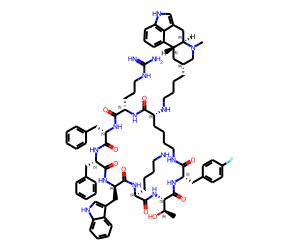

In [80]:
m

## MolEnumerator
(initial release with 2020.09)

Enumerating features from Mol files

This is an initial implementation, more features will be added in future releases.

In [81]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdDepictor
IPythonConsole.molSize = 300,250

### Position variation bonds

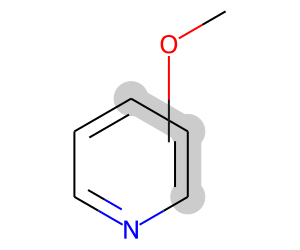

In [82]:
position_variation_mol = Chem.MolFromMolBlock('''
  Mrv2007 06232015292D          

  0  0  0     0  0            999 V3000
M  V30 BEGIN CTAB
M  V30 COUNTS 9 8 0 0 0
M  V30 BEGIN ATOM
M  V30 1 C -1.7083 2.415 0 0
M  V30 2 C -3.042 1.645 0 0
M  V30 3 C -3.042 0.105 0 0
M  V30 4 N -1.7083 -0.665 0 0
M  V30 5 C -0.3747 0.105 0 0
M  V30 6 C -0.3747 1.645 0 0
M  V30 7 * -0.8192 1.3883 0 0
M  V30 8 O -0.8192 3.6983 0 0
M  V30 9 C 0.5145 4.4683 0 0
M  V30 END ATOM
M  V30 BEGIN BOND
M  V30 1 1 1 2
M  V30 2 2 2 3
M  V30 3 1 3 4
M  V30 4 2 4 5
M  V30 5 1 5 6
M  V30 6 2 1 6
M  V30 7 1 7 8 ENDPTS=(3 1 5 6) ATTACH=ANY
M  V30 8 1 8 9
M  V30 END BOND
M  V30 END CTAB
M  END''')
position_variation_mol

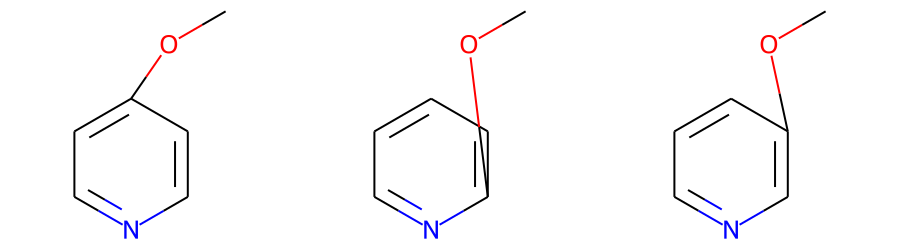

In [83]:
from rdkit.Chem import rdMolEnumerator
ps = rdMolEnumerator.MolEnumeratorParams(rdMolEnumerator.EnumeratorType.PositionVariation)
bndl = rdMolEnumerator.Enumerate(position_variation_mol,ps)
bndl

Those look better if we regenerate coordinates for them:

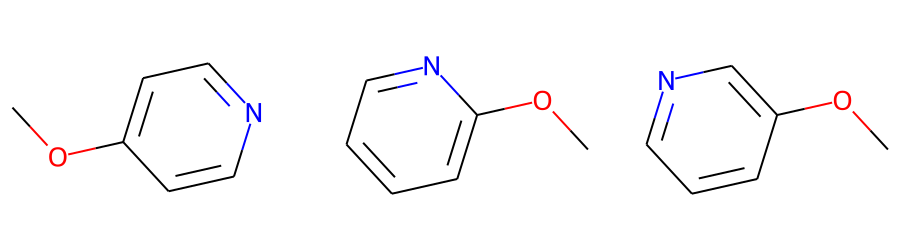

In [84]:
from rdkit.Chem import rdDepictor
for m in bndl:
    rdDepictor.Compute2DCoords(m)
bndl

### Link nodes

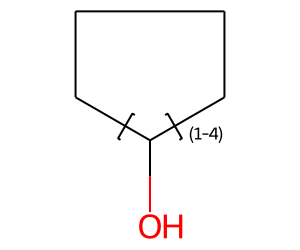

In [85]:
linknode_mol = Chem.MolFromMolBlock('''one linknode
  Mrv2007 06222005102D          

  0  0  0     0  0            999 V3000
M  V30 BEGIN CTAB
M  V30 COUNTS 6 6 0 0 0
M  V30 BEGIN ATOM
M  V30 1 C 8.25 12.1847 0 0
M  V30 2 C 6.9164 12.9547 0 0
M  V30 3 C 6.9164 14.4947 0 0
M  V30 4 C 9.5836 14.4947 0 0
M  V30 5 C 9.5836 12.9547 0 0
M  V30 6 O 8.25 10.6447 0 0
M  V30 END ATOM
M  V30 BEGIN BOND
M  V30 1 1 1 2
M  V30 2 1 2 3
M  V30 3 1 4 5
M  V30 4 1 1 5
M  V30 5 1 3 4
M  V30 6 1 1 6
M  V30 END BOND
M  V30 LINKNODE 1 4 2 1 2 1 5
M  V30 END CTAB
M  END''')
linknode_mol

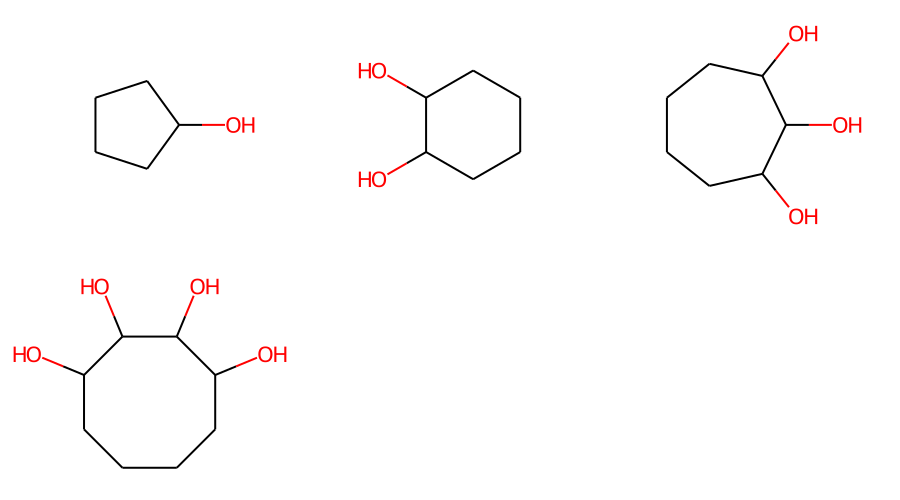

In [86]:
ps = rdMolEnumerator.MolEnumeratorParams(rdMolEnumerator.EnumeratorType.LinkNode)
bndl = rdMolEnumerator.Enumerate(linknode_mol,ps)
for m in bndl:
    rdDepictor.Compute2DCoords(m)
bndl

### SRUs
(2021.09 release)

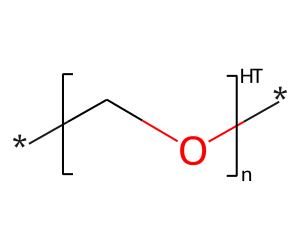

In [87]:
sru_mol = Chem.MolFromMolBlock('''
  ACCLDraw05132106232D

  0  0  0     0  0            999 V3000
M  V30 BEGIN CTAB
M  V30 COUNTS 4 3 1 0 0
M  V30 BEGIN ATOM
M  V30 1 C 9.7578 -7.0211 0 0 
M  V30 2 O 10.7757 -7.6201 0 0 
M  V30 3 * 11.8037 -7.0378 0 0 
M  V30 4 * 8.7298 -7.6034 0 0 
M  V30 END ATOM
M  V30 BEGIN BOND
M  V30 1 1 1 2 
M  V30 2 1 2 3 
M  V30 3 1 1 4 
M  V30 END BOND
M  V30 BEGIN SGROUP
M  V30 1 SRU 1 ATOMS=(2 2 1) XBONDS=(2 3 2) BRKXYZ=(9 9.24 -7.9 0 9.24 -6.72 -
M  V30 0 0 0 0) BRKXYZ=(9 11.29 -6.74 0 11.29 -7.92 0 0 0 0) CONNECT=HT -
M  V30 LABEL=n 
M  V30 END SGROUP
M  V30 END CTAB
M  END''')
sru_mol

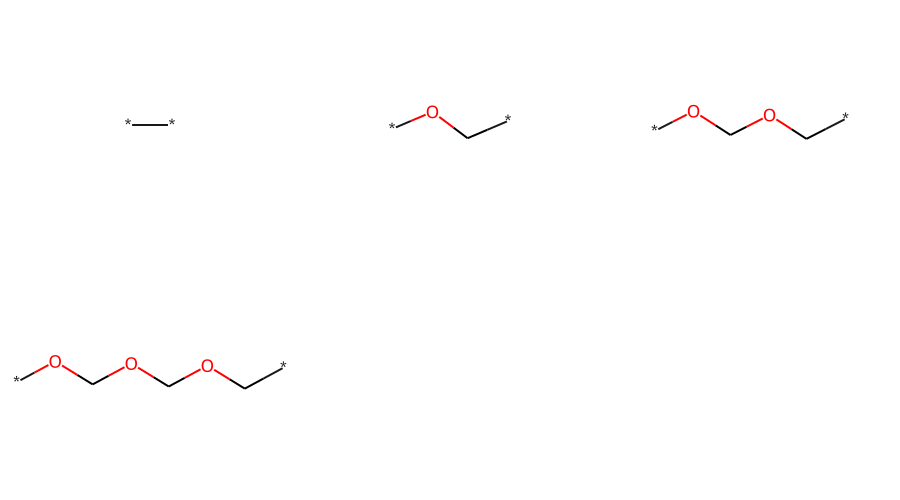

In [88]:
bndl = rdMolEnumerator.Enumerate(sru_mol)
for m in bndl:
    rdDepictor.Compute2DCoords(m)
bndl

We also support head-to-head enumeration:

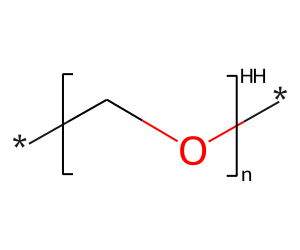

In [89]:
sru_mol = Chem.MolFromMolBlock('''
  ACCLDraw05132106232D

  0  0  0     0  0            999 V3000
M  V30 BEGIN CTAB
M  V30 COUNTS 4 3 1 0 0
M  V30 BEGIN ATOM
M  V30 1 C 9.7578 -7.0211 0 0 
M  V30 2 O 10.7757 -7.6201 0 0 
M  V30 3 * 11.8037 -7.0378 0 0 
M  V30 4 * 8.7298 -7.6034 0 0 
M  V30 END ATOM
M  V30 BEGIN BOND
M  V30 1 1 1 2 
M  V30 2 1 2 3 
M  V30 3 1 1 4 
M  V30 END BOND
M  V30 BEGIN SGROUP
M  V30 1 SRU 1 ATOMS=(2 2 1) XBONDS=(2 3 2) BRKXYZ=(9 9.24 -7.9 0 9.24 -6.72 -
M  V30 0 0 0 0) BRKXYZ=(9 11.29 -6.74 0 11.29 -7.92 0 0 0 0) CONNECT=HH -
M  V30 LABEL=n 
M  V30 END SGROUP
M  V30 END CTAB
M  END''')
sru_mol

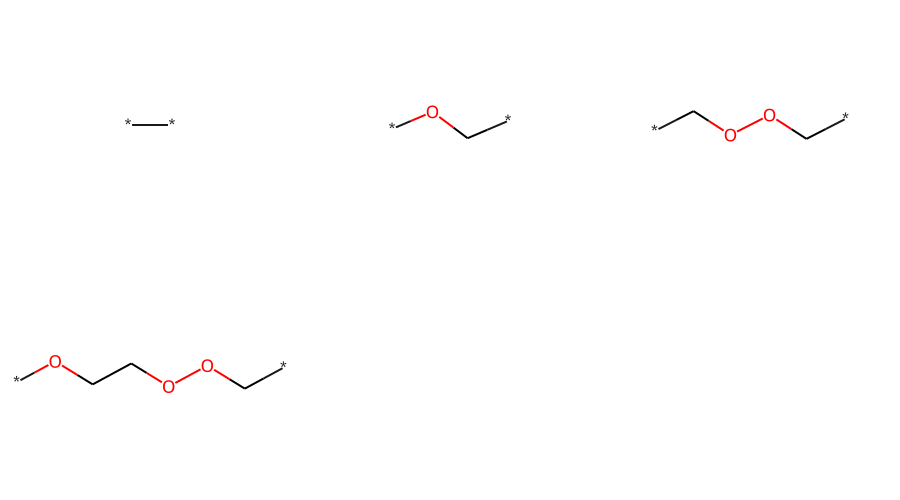

In [90]:
bndl = rdMolEnumerator.Enumerate(sru_mol)
for m in bndl:
    rdDepictor.Compute2DCoords(m)
bndl

And non-overlapping co-polymers

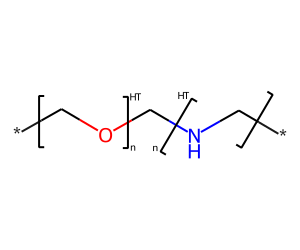

In [91]:
sru_mol = Chem.MolFromMolBlock('''
  Mrv2108 09232105582D          

  0  0  0     0  0            999 V3000
M  V30 BEGIN CTAB
M  V30 COUNTS 7 6 2 0 0
M  V30 BEGIN ATOM
M  V30 1 C 12.719 -9.1518 0 0
M  V30 2 O 14.0458 -9.9326 0 0
M  V30 3 C 15.3857 -9.1735 0 0 
M  V30 4 * 11.379 -9.9108 0 0
M  V30 5 N 16.713 -9.9545 0 0
M  V30 6 C 18.053 -9.1955 0 0
M  V30 7 * 19.3803 -9.9764 0 0
M  V30 END ATOM
M  V30 BEGIN BOND
M  V30 1 1 1 2
M  V30 2 1 2 3
M  V30 3 1 1 4
M  V30 4 1 3 5
M  V30 5 1 5 6
M  V30 6 1 6 7
M  V30 END BOND
M  V30 BEGIN SGROUP
M  V30 1 SRU 0 ATOMS=(2 2 1) XBONDS=(2 2 3) BRKXYZ=(9 12.044 -10.2974 0 -
M  V30 12.044 -8.7593 0 0 0 0) BRKXYZ=(9 14.7161 -8.7854 0 14.7161 -10.3235 0 -
M  V30 0 0 0) CONNECT=HT LABEL=n
M  V30 2 SRU 0 ATOMS=(2 5 6) XBONDS=(2 4 6) BRKXYZ=(9 19.0681 -8.7207 0 -
M  V30 18.131 -10.3134 0 0 0 0) BRKXYZ=(9 15.6979 -10.4293 0 16.6351 -8.8365 -
M  V30 0 0 0 0) CONNECT=HT LABEL=n
M  V30 END SGROUP
M  V30 END CTAB
M  END
''')
sru_mol

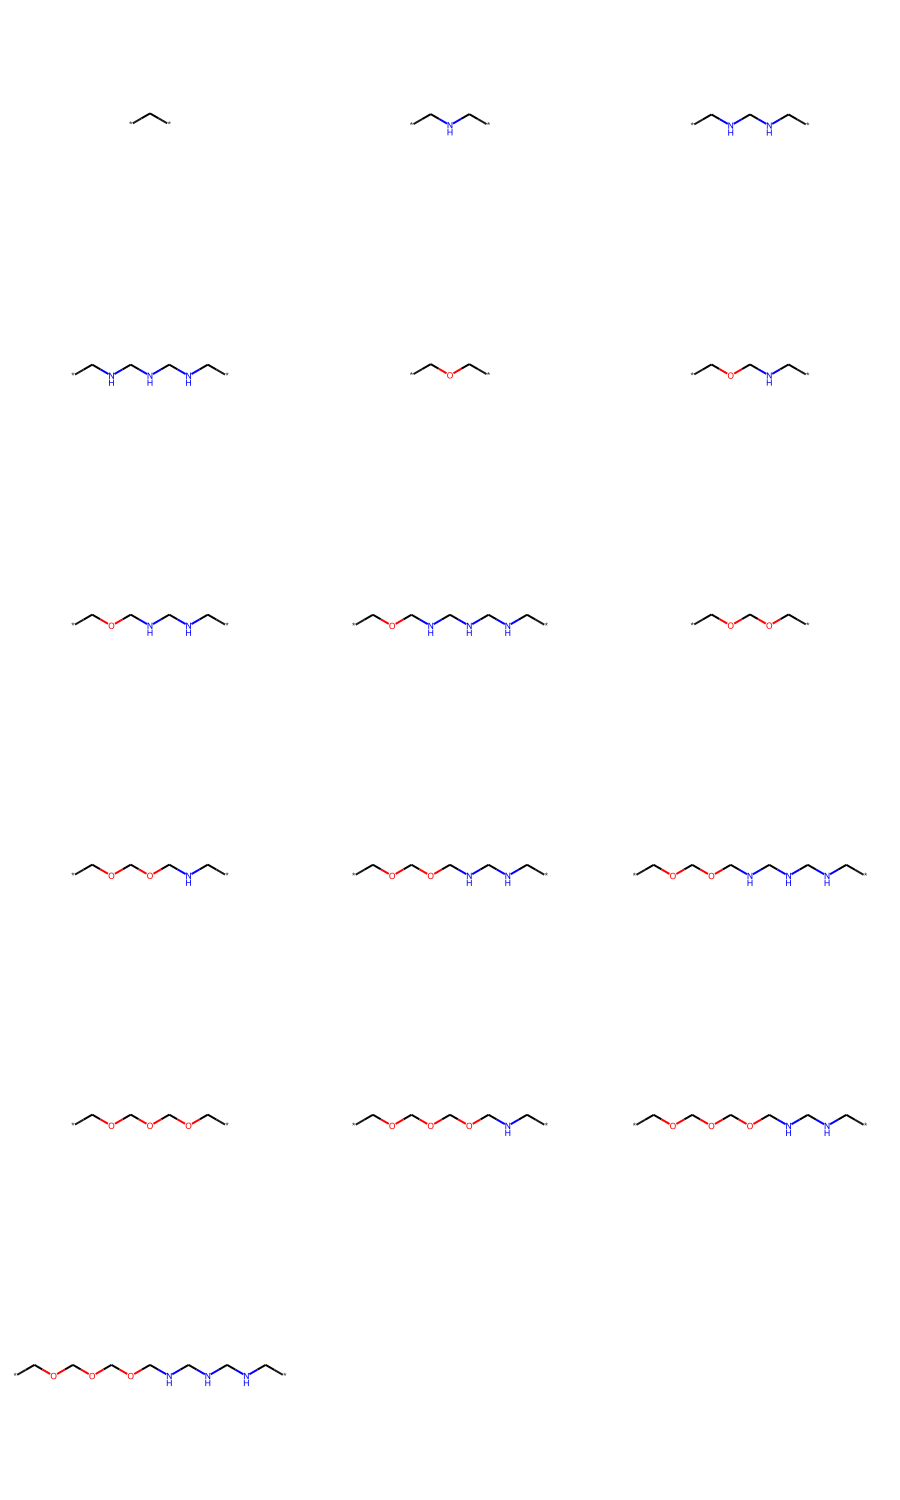

In [92]:
bndl = rdMolEnumerator.Enumerate(sru_mol)
for m in bndl:
    rdDepictor.Compute2DCoords(m)
bndl

But nested/overlapping SRUs are not currently supported:

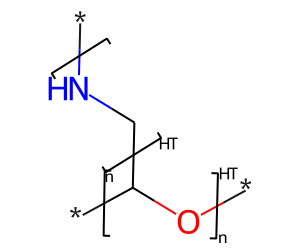

In [93]:
fail_mol = Chem.MolFromMolBlock('''
  ACCLDraw05132106342D

  0  0  0     0  0            999 V3000
M  V30 BEGIN CTAB
M  V30 COUNTS 7 6 2 0 0
M  V30 BEGIN ATOM
M  V30 1 * 9.2115 -7.4169 0 0 
M  V30 2 C 10.2483 -6.8511 0 0 CFG=3 
M  V30 3 C 10.2767 -5.67 0 0 
M  V30 4 O 11.257 -7.4662 0 0 
M  V30 5 * 12.2941 -6.9003 0 0 
M  V30 6 N 9.268 -5.0548 0 0 CFG=3 
M  V30 7 * 9.2964 -3.8737 0 0 
M  V30 END ATOM
M  V30 BEGIN BOND
M  V30 1 1 1 2 
M  V30 2 1 2 3 
M  V30 3 1 2 4 
M  V30 4 1 4 5 
M  V30 5 1 3 6 
M  V30 6 1 6 7 
M  V30 END BOND
M  V30 BEGIN SGROUP
M  V30 1 SRU 1 ATOMS=(5 3 2 4 6 7) XBONDS=(2 1 4) BRKXYZ=(9 9.72 -7.72 0 9.74 -
M  V30 -6.54 0 0 0 0) BRKXYZ=(9 11.79 -6.59 0 11.76 -7.77 0 0 0 0) -
M  V30 CONNECT=HT LABEL=n 
M  V30 2 SRU 2 ATOMS=(2 3 6) XBONDS=(2 6 2) BRKXYZ=(9 8.78 -4.78 0 9.78 -4.15 -
M  V30 0 0 0 0) BRKXYZ=(9 10.76 -5.95 0 9.76 -6.57 0 0 0 0) CONNECT=HT -
M  V30 LABEL=n 
M  V30 END SGROUP
M  V30 END CTAB
M  END''')
fail_mol

In [94]:
bndl = rdMolEnumerator.Enumerate(fail_mol)


ValueError: cannot enumerate overlapping SRU groups

## New stereochemistry code
(2020.09 release)

Demonstrate the shortcomings of the legacy code:

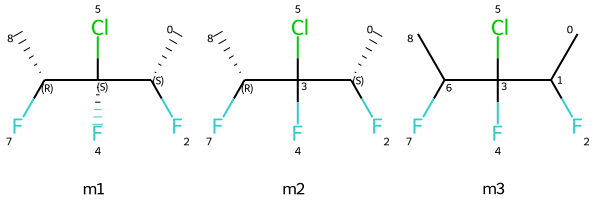

In [95]:
IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.drawOptions.addStereoAnnotation = True
m1 = Chem.MolFromSmiles('C[C@H](F)[C@](F)(Cl)[C@H](F)C')
m2 = Chem.MolFromSmiles('C[C@H](F)C(F)(Cl)[C@H](F)C')
m3 = Chem.MolFromSmiles('CC(F)C(F)(Cl)C(F)C')
Draw.MolsToGridImage((m1,m2,m3),legends=('m1','m2','m3'))

In [96]:
# The old behavior, still the default for FindMolChiralCenters()
for m in (m1,m2,m3):
    print(Chem.FindMolChiralCenters(m,force=True,
                                    includeUnassigned=True))

[(1, 'S'), (3, 'S'), (6, 'R')]
[(1, 'S'), (3, '?'), (6, 'R')]
[(1, '?'), (6, '?')]


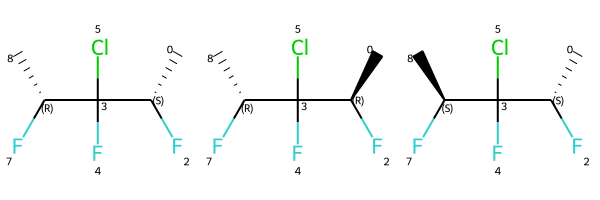

In [97]:
from rdkit.Chem import EnumerateStereoisomers
ms = EnumerateStereoisomers.EnumerateStereoisomers(m3)
Draw.MolsToGridImage(list(ms))

The new code is directly available using `Chem.FindPotentialStereo()`

In [98]:
print("m2")
si = Chem.FindPotentialStereo(m2)
for element in si:
    print(f'  Type: {element.type}, Which: {element.centeredOn}, Specified: {element.specified}, Descriptor: {element.descriptor} ')
print("m3")
si = Chem.FindPotentialStereo(m3)
for element in si:
    print(f'  Type: {element.type}, Which: {element.centeredOn}, Specified: {element.specified}, Descriptor: {element.descriptor} ')

m2
  Type: Atom_Tetrahedral, Which: 1, Specified: Specified, Descriptor: Tet_CCW 
  Type: Atom_Tetrahedral, Which: 3, Specified: Unspecified, Descriptor: NoValue 
  Type: Atom_Tetrahedral, Which: 6, Specified: Specified, Descriptor: Tet_CCW 
m3
  Type: Atom_Tetrahedral, Which: 1, Specified: Unspecified, Descriptor: NoValue 
  Type: Atom_Tetrahedral, Which: 3, Specified: Unspecified, Descriptor: NoValue 
  Type: Atom_Tetrahedral, Which: 6, Specified: Unspecified, Descriptor: NoValue 


In [99]:
m = Chem.MolFromSmiles('C/C=C/CC=CC/C=C/C')
si = Chem.FindPotentialStereo(m)
for element in si:
    print(f'  Type: {element.type}, Which: {element.centeredOn}, Specified: {element.specified}, Descriptor: {element.descriptor} ')

  Type: Bond_Double, Which: 1, Specified: Specified, Descriptor: Bond_Trans 
  Type: Bond_Double, Which: 4, Specified: Unspecified, Descriptor: NoValue 
  Type: Bond_Double, Which: 7, Specified: Specified, Descriptor: Bond_Trans 


We can also use the new code in `Chem.FindMolChiralCenters()` by using the `useLegacyImplementation` argument.


[(1, 'S'), (3, 's'), (6, 'R')]
[(1, 'S'), (3, '?'), (6, 'R')]
[(1, '?'), (3, '?'), (6, '?')]


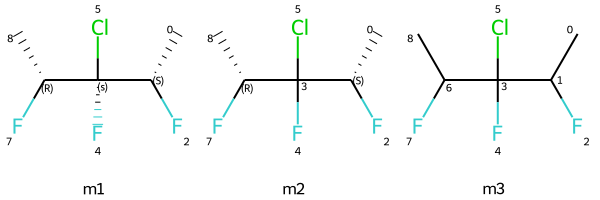

In [100]:
for m in (m1,m2,m3):
    print(Chem.FindMolChiralCenters(m,force=True,
                                    includeUnassigned=True,
                                    useLegacyImplementation=False))
Draw.MolsToGridImage((m1,m2,m3),legends=('m1','m2','m3'))

And after telling `FindMolChiralCenters()` to use the new code, we get all answers from `EnumerateStereoisomers()` too:

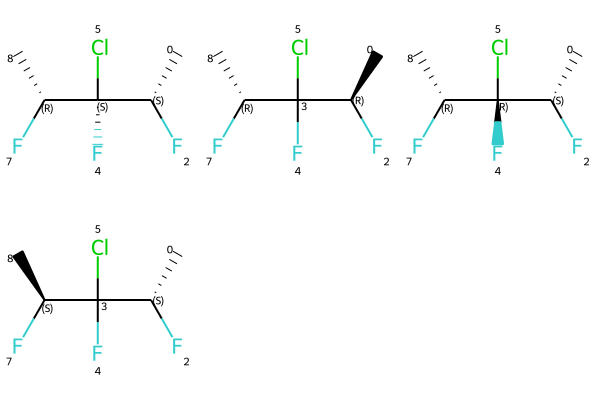

In [101]:
from rdkit.Chem import EnumerateStereoisomers
ms = EnumerateStereoisomers.EnumerateStereoisomers(m3)
Draw.MolsToGridImage(list(ms))

An extreme example:

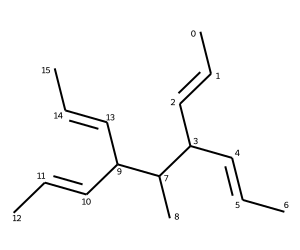

In [102]:
# Thanks to Salome Rieder for this example
mol = Chem.MolFromSmiles('CC=CC(C=CC)C(C)C(C=CC)C=CC')
mol

In [103]:
si = Chem.FindPotentialStereo(mol)
for element in si:
    print(f'  Type: {element.type}, Which: {element.centeredOn}, Specified: {element.specified}, Descriptor: {element.descriptor} ')
_ = Chem.FindMolChiralCenters(m,force=True,
                                includeUnassigned=True,
                                useLegacyImplementation=False)

  Type: Atom_Tetrahedral, Which: 3, Specified: Unspecified, Descriptor: NoValue 
  Type: Atom_Tetrahedral, Which: 7, Specified: Unspecified, Descriptor: NoValue 
  Type: Atom_Tetrahedral, Which: 9, Specified: Unspecified, Descriptor: NoValue 
  Type: Bond_Double, Which: 1, Specified: Unspecified, Descriptor: NoValue 
  Type: Bond_Double, Which: 4, Specified: Unspecified, Descriptor: NoValue 
  Type: Bond_Double, Which: 10, Specified: Unspecified, Descriptor: NoValue 
  Type: Bond_Double, Which: 13, Specified: Unspecified, Descriptor: NoValue 


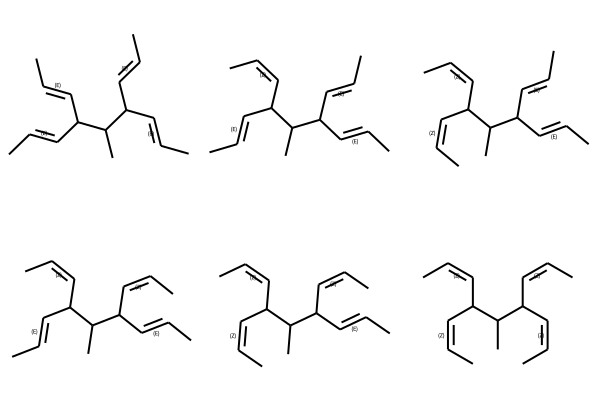

In [104]:
IPythonConsole.drawOptions.addAtomIndices = False

ms = EnumerateStereoisomers.EnumerateStereoisomers(mol)
Draw.MolsToGridImage(list(ms),molsPerRow=3)

This will be expanded and likely become the default for the 2021.03 release.

### Accurate CIP labels

Start with a molecule that the current code gets wrong:

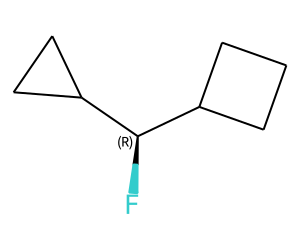

In [105]:
IPythonConsole.drawOptions.addAtomIndices = False
IPythonConsole.drawOptions.addStereoAnnotation = True
m = Chem.MolFromSmiles('C1CC1[C@H](F)C1CCC1')
m

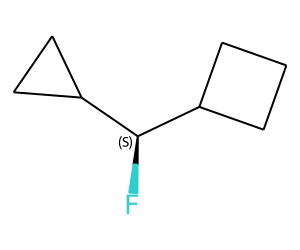

In [106]:
from rdkit.Chem import rdCIPLabeler
rdCIPLabeler.AssignCIPLabels(m)
m

Ring stereochemistry was previously also not properly labelled:

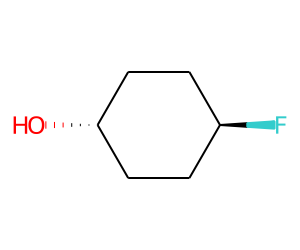

In [107]:
m = Chem.MolFromSmiles('F[C@H]1CC[C@H](O)CC1')
m

But it is now:

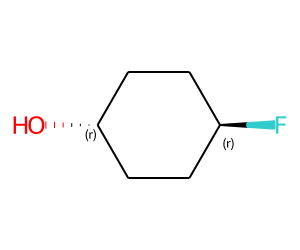

In [108]:
rdCIPLabeler.AssignCIPLabels(m)
m

## Deprotections
(2020.09 release)



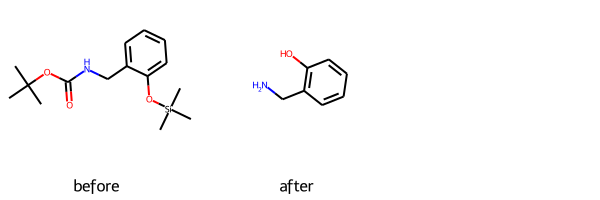

In [109]:
from rdkit.Chem import rdDeprotect
smiles = "N(C(=O)OC(C)(C)C)Cc1ccccc1O[Si](C)(C)C"
mol = Chem.MolFromSmiles(smiles)
deprotected_mol = rdDeprotect.Deprotect(mol)
Draw.MolsToGridImage((mol,deprotected_mol),legends=('before','after'))

In [110]:
print(list(deprotected_mol.GetPropsAsDict()["DEPROTECTIONS"]))

['TMS', 'Boc']


Look at the deprotections available:

In [111]:
dv = rdDeprotect.GetDeprotections()
for dd in dv:
    print(dd.abbreviation,dd.deprotection_class,dd.example)

TBDMS alcohol CC(C)(C)[Si](C)(C)OC>>OC
MMT alcohol COc1ccc(C(ON)(c2ccccc2)c2ccccc2)cc1>>NO
THP alcohol COC1CCCCO1>>CO
MOM alcohol COCOC>>CO
MEM alcohol C(C)(C)OCOCCOC>>C(C)(C)O
Bn alcohol NOc1ccccc1>>ON
TMS alcohol NO[Si](C)(C)C>>NO
Bz alcohol COC(=O)c1ccccc1>>OC
Piv alcohol CC(C)(C)C(=O)ON>>NO
TIPS alcohol NO[Si](C(C)C)(C(C)C)(C(C)C)>>ON
Ac alcohol NOC(=O)C>>NO
PMB alcohol c1cc(OC)ccc1CON>>NO
Tr alcohol CN(C)C(c1ccccc1)(c1ccccc1)c1ccccc1>>CNC
Phth amine O=C1N(C(=O)c2ccccc12)C1=CC=CC=C1>>Nc1ccccc1
SEM amine C[Si](C)(C)CCOCNO>>NO
PMP amine COc1ccc(NO)cc1>>NO
Ts amine Cc1ccc(cc1)S(NO)(=O)=O>>NO
Boc amine N(C(=O)OC(C)(C)C)Cc1ccccc1NC(=O)OC(C)(C)C>>NCc1ccccc1N
TFA amine ONC(=O)C(F)(F)F>>NO
Bz amine ONC(=O)c1ccccc1>>NO
Fmoc amine CN(C)C(=O)OCC1C2=CC=CC=C2C2=C1C=CC=C2>>CNC
Bn amine CN(C)Cc1ccccc1>>CNC
Ac amine N(C)(C)C(=O)C>>CNC
Cbz amine N(C)(C)C(=O)OCc1ccccc1>>CNC
Acetyl/Ketal carbonyl O=C(OC)C1CCC(OC2)(OC2)CC1>>COC(=O)C1CCC(O)CC1


We can also choose to apply only particular deprotections:

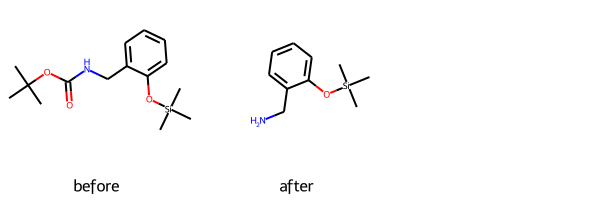

In [112]:
only_amines = [x for x in rdDeprotect.GetDeprotections() if x.deprotection_class=='amine']
deprotected_mol = rdDeprotect.Deprotect(mol,only_amines)
Draw.MolsToGridImage((mol,deprotected_mol),legends=('before','after'))

## Better handling of isotopes with RemoveHs()


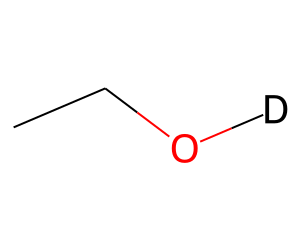

In [113]:
IPythonConsole.drawOptions.atomLabelDeuteriumTritium=True
m = Chem.MolFromSmiles('CCO[2H]')
m

By default the D is not removed by `RemoveHs()`:

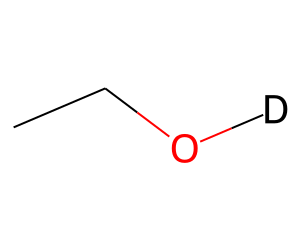

In [114]:
Chem.RemoveHs(m)

But we can change that by setting `removeAndTrackIsotopes` in the `RemoveHsParameters()`

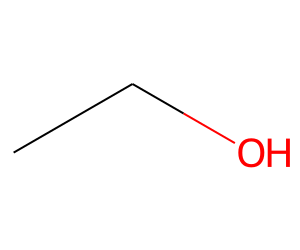

In [115]:
ps = Chem.RemoveHsParameters()
ps.removeAndTrackIsotopes=True
nm = Chem.RemoveHs(m,ps)
nm

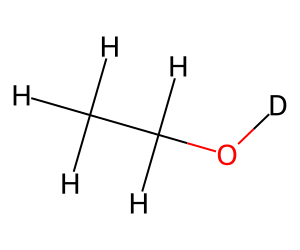

In [116]:
Chem.AddHs(nm)

## Improvements to reaction chirality handling
(2020.09 release)

The recognition and handling of chirality in reactions has been significantly improved.

Here are some examples which are now properly handled:

Rearranged attachments on the chiral center:

In [117]:
from rdkit.Chem import AllChem
rxn = AllChem.ReactionFromSmarts('[C:1][C@:2]([F:3])[Br:4]>>[C:1][C@@:2]([S:4])[F:3]')
mol = Chem.MolFromSmiles('C[C@@H](F)Br')
ps=rxn.RunReactants((mol,))
Chem.MolToSmiles(ps[0][0],True)

'C[C@@H](F)S'

Adding a neighbor to a chiral atom:

In [118]:
rxn = AllChem.ReactionFromSmarts('[C:1][C@H:2]([F:3])[Br:4]>>[C:1][C@@:2](O)([F:3])[Br:4]')
mol = Chem.MolFromSmiles('C[C@@H](F)Br')
ps=rxn.RunReactants((mol,))
Chem.MolToSmiles(ps[0][0],True)

'C[C@](O)(F)Br'

Removing an atom from a chiral atom:

In [119]:
rxn = AllChem.ReactionFromSmarts('[C:1][C@:2](O)([F:3])[Br:4]>>[C:1][C@@H:2]([F:3])[Br:4]')
mol = Chem.MolFromSmiles('C[C@@](O)(F)Br')
ps=rxn.RunReactants((mol,))
Chem.MolToSmiles(ps[0][0],True)

'C[C@H](F)Br'

## Reproducibly getting multiple random SMILES strings for a molecule

This is something which is frequently used to do data augmentation when training neural networks which operate directly on SMILES.

In [120]:
m = Chem.MolFromSmiles('Oc1ncc(OC(CC)C)cc1')
Chem.MolToRandomSmilesVect(m,5)

['C(CC)(C)Oc1cnc(cc1)O',
 'CCC(Oc1cnc(O)cc1)C',
 'CC(Oc1ccc(nc1)O)CC',
 'c1cc(ncc1OC(CC)C)O',
 'C(C)C(Oc1cnc(O)cc1)C']

By default the results are not reproducible:

In [121]:
Chem.MolToRandomSmilesVect(m,5)

['n1cc(OC(C)CC)ccc1O',
 'c1c(cnc(O)c1)OC(C)CC',
 'c1nc(O)ccc1OC(C)CC',
 'Oc1ncc(cc1)OC(CC)C',
 'n1c(O)ccc(OC(C)CC)c1']

But we can provide a random number seed:

In [122]:
v1 = Chem.MolToRandomSmilesVect(m,5,randomSeed=0xf00d)
v1

['Oc1ccc(OC(CC)C)cn1',
 'CC(CC)Oc1cnc(O)cc1',
 'c1(O)ncc(cc1)OC(C)CC',
 'c1cc(cnc1O)OC(CC)C',
 'c1c(OC(CC)C)cnc(c1)O']

In [123]:
v2 = Chem.MolToRandomSmilesVect(m,5,randomSeed=0xf00d)
v2 == v1

True

## Enhanced stereo and substructure search

The substructure matcher can also, optionally, take enhanced stereochemistry into account.

Here the rules are:
```
Substructure search using molecules with enhanced stereochemistry follows these rules (where substructure < superstructure):

* achiral < everything, because an achiral query means ignore chirality in the match
* chiral < AND, because AND includes both the chiral molecule and another one
* chiral < OR, because OR includes either the chiral molecule or another one
* OR < AND, because AND includes both molecules that OR could actually mean.
* one group of two atoms < two groups of one atom, because the latter is 4 different
diastereomers, and the former only two of the four.
```


Start by looking at the match table if we don't take enhanced stereo into account:

In [124]:
smis = ('C[C@H](F)O[C@H](O)F','C[C@@H](F)O[C@@H](O)F','C[C@H](F)O[C@@H](O)F',
        'C[C@H](F)O[C@H](O)F |o1:1,4|','C[C@H](F)O[C@H](O)F |&1:1,4|')

ms = [Chem.MolFromSmiles(x) for x in smis]
HTML(match_table(ms,ms,includeSmarts=False,useChirality=True))

Now use enhanced stereo:

In [125]:
HTML(match_table(ms,ms,includeSmarts=False,useChirality=True,useEnhancedStereo=True))

*Note*: these tables are transposed relative to what you find in the RDKit documentation.